# Airbnb Bangkok Listings Analysis
---

<img src="https://upload.wikimedia.org/wikipedia/commons/6/69/Airbnb_Logo_B%C3%A9lo.svg" alt="Alternative text" />

# Background

During COVID-19 pandemic, international tourism in many countries, including Thailand, collapsed as borders closed to stop the spread of the virus. However, as restrictions gradually eased in Thailand throughout 2022, international tourism began to recover rapidly. By the end of 2022, thailand welcomed 11.15 million international visitors, a dramatic increased compared from just 430,000 in 2021. With this optimistic recovery, Thailand's tourism authorities are now targeting 25 million international visitors in 2023.

Airbnb is an online marketplace company by connecting people who want to rent out their property (host) for people who are looking for short-and-long-terms homestays or accomodation (guest). This is the most famous company for short-term housing rentals which has spread to various countries including Thailand. Recognize the growth of international tourism visitors in 2023, the company wants to seize this opportunity to increase the sales. To achieve this, Airbnb plans to concentrate its efforts on Bangkok, as it is the most visited city in Thailand & ranked top in international tourism rankings. The company has enlisted the help of a data scientist to provide valuable insights for its business and marketing teams.

References:
* https://www.spglobal.com/marketintelligence/en/mi/research-analysis/thailands-economy-rebounds-in-early-2023-as-tourism-surges-may23.html
* https://thediplomat.com/2023/01/thai-tourism-recovery-on-track-as-international-arrivals-jump/

# Problem Statement

The company aims to maximize the sales significantly in 2023 by leveraging data insights. There are several topic the business & marketing team wants to know:
* Best-selling product types
* Opportunities for new market segments
* Factors influencing pricing
* Growing popularity

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

from scipy.stats import normaltest, mannwhitneyu, kruskal, chi2_contingency

# Data Understanding

| Feature                           | Description                                                                                       |
|-----------------------------------|---------------------------------------------------------------------------------------------------|
| id                                | Airbnb's unique identifier for the listing.                                                       |
| name                              | Name of the listing.                                                                              |
| host_id                           | Airbnb's unique identifier for the host/user.                                                     |
| host_name                         | Name of the host. Usually, just the first name(s).                                                |
| neighbourhood                      | The specific area where the listing is located.                                                  |
| latitude                          | The geographic coordinate that specifies the north-south position of the listing.                 |
| longitude                         | The geographic coordinate that indicates the east-west position of the listing.                   |
| room_type                         | (1) Entire home/apt; (2) Private room; (3) Shared room; (4) Hotel.                                |
| price                             | Daily price in local currency.                                                                    |
| minimum_nights                    | The minimum number of night stays for the listing (calendar rules may differ).                    |
| number_of_reviews                 | The number of reviews the listing has.                                                            |
| last_review                       | The date of the last/newest review.                                                               |
| reviews_per_month                 | The average number of reviews that a listing receives per month                                   |
| calculated_host_listings_count    | The number of listings the host has in the current scrape in the city/region geography.           |
| availability_365                  | The calendar determines the availability of the listing x days in the future.                     |
| number_of_reviews_ltm             | The number of reviews the listing has (in the last 12 months).                                    |

In [2]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')

# Display data
display(df.head(), df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [3]:
# Print shape of the dataset
print(f'Number of observations and features in the dataset: {df.shape}')

# General info of the data
df.info()

Number of observations and features in the dataset: (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews            

Notes:
- Drop `Unnamed: 0` as it is useless column.
- `last_review` has date type value, therefore the Dtype of this column needs to be changed to date.

In [4]:
df = df.drop(columns='Unnamed: 0', axis=1)

df['last_review'] = pd.to_datetime(df['last_review'])

In [5]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,2021-08-30 08:37:49.316375296,0.813145,13.889618,244.378643,3.481519
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,2012-12-15 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,2020-02-20 00:00:00,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,2022-10-24 00:00:00,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,2022-12-08 00:00:00,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,NaN,1.090196,30.269848,125.843224,8.916937


,name,host_name,neighbourhood,room_type
count,15846,15853,15854,15854
unique,14794,5312,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,228,2153,8912


Notes:
- The minimum `price` is 0. (This will be addressed later!)
- The maximum `price` is 1.1 million. (Is it possible to have daily prices in the million range?)
- All important numerical variables data seems to be skewed.

In [6]:
null_data = []

for col in df.columns:
    null_data.append([col, df[col].isnull().sum(), df[col].isnull().sum() / df.shape[0] * 100])

pd.DataFrame(data=null_data, columns=['column', 'total_null', 'total_null_pct'])

,column,total_null,total_null_pct
0,id,0,0.000000
1,name,8,0.050460
2,host_id,0,0.000000
3,host_name,1,0.006308
4,neighbourhood,0,0.000000
5,latitude,0,0.000000
6,longitude,0,0.000000
7,room_type,0,0.000000
8,price,0,0.000000
9,minimum_nights,0,0.000000


Notes:
- `name`, `host_name`, `last_review`, `reviews_per_month` are the columns with null values.

In [7]:
pd.set_option('display.max_colwidth', None)

unique_data = []
for col in df.columns:
    unique_data.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(data=unique_data, columns=['Column Name', 'Total Unique Value', 'Unique Value'])

,Column Name,Total Unique Value,Unique Value
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 

Note:
- `name` values can contain emoji or in non-english languages.
- `neighbourhood` values seem to have many typos.

# Data Cleaning

**Steps**:
- Handling Missing Data
- Assessing Outliers
- Removing Duplicates
- Fixing Inconsistent Data

## Handling Missing Data

Column with missing data:
- `name`
- `host_name`
- `last_review`
- `reviews_per_month`

### `name`

In [8]:
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Notes:
- Hosts have to fill the listing name in Airbnb. If there's a null value, it will be difficult to be predicted because host can write whatever they want (random).
- One way to fill the null values on `name` is looking based on `calculated_host_listings_count`, i can fill the null with another listing name that locate in the same city. But only Pakaphol with `calculated_host_listings_count` more than 1.

In [9]:
df[df['host_name'].isin(df[df['name'].isnull()]['host_name'])].groupby(['host_name', 'neighbourhood', 'name'])['name'].count()

host_name  neighbourhood  name                                              
Cherry     Huai Khwang    3 นาทีถึง MRT ห้วยขวาง Amaranta residents             1
                          Amaranta ressident                                    1
           Khlong Toei    Cozy room in big city.                                1
           Ratchathewi    New room near city center, Siam paragon, mbk          1
           Sathon         K10】Sathon Luxury Apt Sky pool&gym&Lounge&parking     1
                          K10】曼谷沙吞金融中心全新高端公寓1+1房&屋顶无边泳池空中Gym&泰国第一高楼景观&近BTS轻轨    1
                          K11】Sathon Pool&Gym&Parking&Cook&Upscale condo        1
                          K13】曼谷沙吞区金融中心全新复式高端公寓&泰国第一高楼景观&无边泳池空中Gym&5分钟到BTS轻轨    1
                          K15】BKK Sathorn Duplex Luxury APT&SKY Pool&SKY Gym    1
                          K16】曼谷沙吞金融中心像素大厦景观&全新复式挑高公寓&屋顶无边泳池&空中健身房&5分钟到BTS轻轨    1
                          K1】曼谷沙吞CBD金融中心全新豪华精装公寓&屋顶无边泳池Gym&泰国第一高楼像素大厦景观&近BTS    1
                     

Notes:
- It turns out only Cherry & Pakhapol that have another listing.
- Pakaphol only have 1 listing name in the same neighbourhood, i can fill the null values based on that name.
- While for cherry doesn't have the same listing in the same neighbourhood & the names of the listings seems different.
- For others, i will check if maybe there's a similarity in name with same value of neighbourhood and room_type also close price.

In [10]:
df.loc[(df['name'].isnull()) & (df['host_name'] == 'Pakaphol'), 'name'] = 'Errday Guest House'

In [11]:
pd.set_option('display.max_colwidth', None)

unique_data = []
neighbourhood_null = df[df['name'].isnull()]['neighbourhood']
room_type_null = df[df['name'].isnull()]['room_type']
price_null = df[df['name'].isnull()]['price']
for val1, val2, val3 in zip(neighbourhood_null, room_type_null, price_null):
    name_null = df[(df['neighbourhood'] == val1) & (df['room_type'] == val2) & (abs(df['price'] - val3) <= 500)]['name'].unique() 
    unique_data.append([val1, val2, val3, name_null])

pd.DataFrame(data=unique_data, columns=['neighbourhood', 'room_type', 'price', 'unique_value'])

neighbourhood        room_type  price  \
0  Phra Khanong     Private room   1080   
1     Din Daeng     Private room   1200   
2    Bang Phlat     Private room   1200   
3       Bang Na  Entire home/apt   2424   
4       Vadhana     Private room   5000   
5   Ratchathewi     Private room    930   
6       Vadhana     Private room   1000   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Notes:
- As expected, the names are random although I saw names that had been filtered based on the same neighborhood & room_type as well as close price.
- I will drop the remaining null values on `name` since it's also small.

In [12]:
df = df.dropna(subset='name', axis=0)

### `host_name`

In [13]:
df[df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Notes:
- Let's check first is there any data with same host_id. If yes, i can fill the null with the same host_name.
- If not, i can fill the null with arbitrary/random value since i don't have a plan to deep dive on `host_name`.

In [14]:
df[df['host_id'] == 137488762]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [15]:
df.loc[df['host_name'].isnull(), 'host_name'] = '?'

### `last_review` & `reviews_per_month`

In [16]:
display(df[df['last_review'].isnull()], df[df['reviews_per_month'].isnull()])

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


Notes:
- The null values in `last_review` & `reviews_per_month` seems to be on the same index so we can handle this problem together.
- My hypothesis is most likely because `number_of_reviews` value is 0.
- Let's validate first by checking the unique data of `number_of_reviews` with `last_review` or `reviews_per_month` is null.

In [17]:
df[df['last_review'].isnull()]['number_of_reviews'].unique()

array([0], dtype=int64)

In [18]:
df[df['reviews_per_month'].isnull()]['number_of_reviews'].unique()

array([0], dtype=int64)

Notes:
- My hypothesis is correct that data with `last_review` & `reviews_per_month` has `number_of_reviews` value 0.
- I won't deep dive on all last_review so it's best to just leave it at that.
- i will fill `reviews_per_month` with 0.

In [19]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

## Assessing Outliers

### Graphical Methods

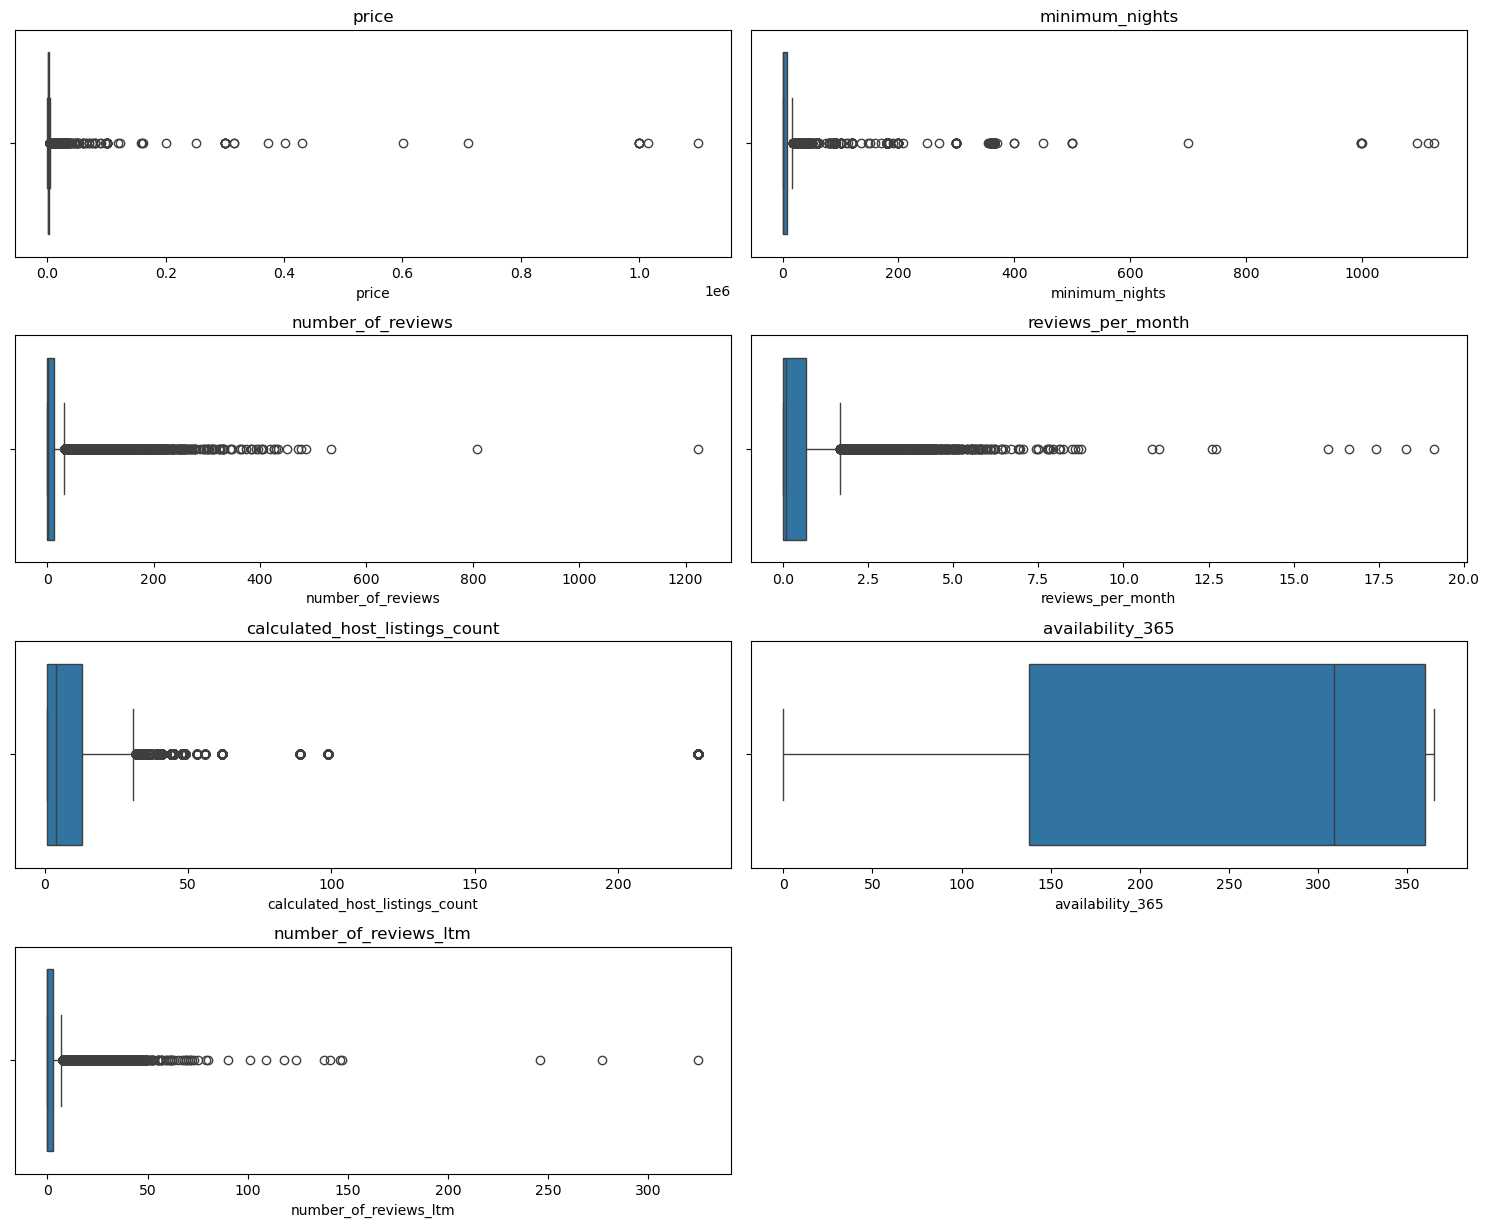

In [20]:
num_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

plt.figure(figsize=(15, 15))

for i, col in enumerate(num_cols):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()

plt.show()

Notes:
- All numerical variables seems to have many outliers values except `availability_365`.
- All numerical variables also seems to have right skew distribution except `availability_365`.

In [21]:
outliers_data = []

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    num_of_outliers = len(df[(df[col] > upper_limit) | (df[col] < lower_limit)])
    num_of_outliers_pct = num_of_outliers / df.shape[0] * 100
    outliers_data.append([col, lower_limit, upper_limit, num_of_outliers, num_of_outliers_pct, df[col].min(), df[col].max()])

pd.DataFrame(data=outliers_data, columns=['column', 'lower_limit', 'upper_limit', 'num_of_outliers', 'num_of_outliers_pct', 'min_value', 'max_value'])

,column,lower_limit,upper_limit,num_of_outliers,num_of_outliers_pct,min_value,max_value
0,price,0,4722.500,1402,8.847100,0.0,1100000.00
1,minimum_nights,0,16.000,3168,19.991166,1.0,1125.00
2,number_of_reviews,0,32.500,2240,14.135168,0.0,1224.00
3,reviews_per_month,0,1.675,1471,9.282514,0.0,19.13
4,calculated_host_listings_count,0,31.000,1832,11.560548,1.0,228.00
5,availability_365,0,693.000,0,0.000000,0.0,365.00
6,number_of_reviews_ltm,0,7.500,2219,14.002650,0.0,325.00


Notes:

- `price`
    - Minimum value of `price` is 0. It shouldn't be possible to be priced at 0.
    - Maximum value of `price` is 1.1m. Based on external data from [here](https://arrived.com/blog/10-most-expensive-airbnbs-in-the-world), the 10th most expensive listing is in California at $7600 (≈ 258.476 Baht).
    - Even from airbnb [search](https://www.airbnb.com/s/Thailand/homes?refinement_paths%5B%5D=%2Fhomes&adults=2&children=0) , the highest price for a listing now at Bangkok is ± 100.000 THB.

- `minimum_nights`
    - The minimum stay of 1 year is quite impractical; there are even numbers that extend for several years in the data.
    - The maximum of stay that can be searched by guests is 12 month.

- `availability_365`
    - `availability_365` is the only column with 0 outliers.
    - It is possible to have `availability_365` of 0. It can indicate that the listing has been rented in all possible availability.

- Natural outliers can provide valuable insights. Hence, it's important to not replace the outlier data because that can lead to biased results.
- But for the outliers that don't make sense, i will find the pattern from the data first.

### `price`

In [22]:
display(df.loc[df['price'] == 0], df.loc[df['price'] > 100000])

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaT,0.0,1,0,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,2020-03-04,0.09,6,180,0
1239,8880974,"Modern,wifi,5m MRT&2 Shopping Mall",30803267,Yasmine,Huai Khwang,13.759950,100.569360,Entire home/apt,1000000,100,45,2016-09-05,0.51,4,180,0
1779,11579635,"2 Bedroom,wifi,5mMRT&Shopping Mall",30803267,Yasmine,Huai Khwang,13.754710,100.565980,Entire home/apt,1000000,100,53,2018-02-20,0.64,4,249,0
1850,12056763,Charoenkrung Road House/Office Rent,62898498,Charlie,Bang Rak,13.727880,100.518720,Entire home/apt,300000,365,0,NaT,0.00,1,365,0
1986,13033135,Airport-MRT-ShowShopFood-FullFN,34158729,Chayakorn,Din Daeng,13.784330,100.570660,Private room,300000,120,0,NaT,0.00,1,358,0
2507,15380964,"Resort Style Luxury apartment,5min to MRT,freeWifi",30803267,Yasmine,Huai Khwang,13.758770,100.569430,Entire home/apt,100686,1,40,2019-09-13,0.55,4,180,0
2568,16045517,"BTS Wongwianyai, Rooftop Pool, Wifi",94426146,Wanlapatch,Khlong San,13.721550,100.495170,Entire home/apt,160000,3,20,2018-04-26,0.27,1,179,0
2668,16139502,Nice Check-in My Hostel (Private 2 beds),51074483,Nuttawut,Ratchathewi,13.751130,100.527310,Hotel room,300000,1,2,2020-02-23,0.03,5,365,0
4194,22059876,C,160989331,Annchalee,Thon buri,13.716930,100.483300,Private room,161516,500,3,2018-07-31,0.05,1,0,0
4373,22633450,rm 1 : cozy & comfy,117057915,Jeab,Bang Phlat,13.791630,100.490380,Private room,600700,1,9,2020-01-26,0.17,5,330,0


In [23]:
df.loc[df['host_id'] == 30803267]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1239,8880974,"Modern,wifi,5m MRT&2 Shopping Mall",30803267,Yasmine,Huai Khwang,13.75995,100.56936,Entire home/apt,1000000,100,45,2016-09-05,0.51,4,180,0
1779,11579635,"2 Bedroom,wifi,5mMRT&Shopping Mall",30803267,Yasmine,Huai Khwang,13.75471,100.56598,Entire home/apt,1000000,100,53,2018-02-20,0.64,4,249,0
2507,15380964,"Resort Style Luxury apartment,5min to MRT,freeWifi",30803267,Yasmine,Huai Khwang,13.75877,100.56943,Entire home/apt,100686,1,40,2019-09-13,0.55,4,180,0
4620,23740993,"Modern&Luxury apartment,5min to MRT,freeWifi",30803267,Yasmine,Huai Khwang,13.76065,100.56898,Entire home/apt,1000000,1,12,2020-03-24,0.22,4,336,0


In [24]:
df.loc[df['host_id'] == 117057915]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3411,18604369,rm 2 : cozy & cool,117057915,Jeab,Bang Phlat,13.79213,100.49046,Private room,600,1,25,2021-11-10,0.37,5,361,0
3421,18605590,rm 3 : cozy & sweet,117057915,Jeab,Bang Phlat,13.79079,100.48883,Private room,600,1,2,2019-01-08,0.03,5,330,0
4373,22633450,rm 1 : cozy & comfy,117057915,Jeab,Bang Phlat,13.79163,100.49038,Private room,600700,1,9,2020-01-26,0.17,5,330,0
6472,30792632,rm 8 : cozy & chic,117057915,Jeab,Bang Phlat,13.79275,100.48872,Private room,614,1,5,2019-12-23,0.10,5,364,0
12792,629653142142561774,rm 6 : bright morning sunlight.,117057915,Jeab,Bang Phlat,13.79049,100.48816,Private room,400717,1,0,NaT,0.00,5,241,0


In [25]:
df.loc[df['host_id'] == 62898498]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1850,12056763,Charoenkrung Road House/Office Rent,62898498,Charlie,Bang Rak,13.72788,100.51872,Entire home/apt,300000,365,0,NaT,0.0,1,365,0


In [26]:
outliers_price_data = []
for i in df.loc[(df['price'] == 0) | (df['price'] > 100000)].index:
    host_id = df.loc[i, 'host_id']
    neighbourhood = df.loc[i, 'neighbourhood']
    total_same_neighbourhood_listings = df.loc[(df['host_id'] == host_id) & (df['neighbourhood'] == neighbourhood) & (df['price'] <= 100000), 'id'].count()
    avg_price = round(df.loc[(df['host_id'] == host_id) & (df['neighbourhood'] == neighbourhood) & (df['price'] <= 100000), 'price'].mean(), 0)
    outliers_price_data.append([host_id, neighbourhood, total_same_neighbourhood_listings, avg_price])

pd.DataFrame(data=outliers_price_data, columns=['host_id', 'neighbourhood', 'total_same_neighbourhood_lisings', 'avg_price']).drop_duplicates().reset_index(drop=True)

,host_id,neighbourhood,total_same_neighbourhood_lisings,avg_price
0,323158,Chatu Chak,0,NaN
1,30803267,Huai Khwang,0,NaN
2,62898498,Bang Rak,0,NaN
3,34158729,Din Daeng,0,NaN
4,94426146,Khlong San,0,NaN
5,51074483,Ratchathewi,0,NaN
6,160989331,Thon buri,0,NaN
7,117057915,Bang Phlat,3,605.0
8,91426608,Vadhana,2,1118.0
9,51074483,Parthum Wan,0,NaN


Notes:
* Some host can have multiple listings.
* I will assign the null value by the mean of the price of the multiple listings with the same host_id.
* If the host doesn't have any listing, i will drop the data.

In [27]:
for i in df.loc[(df['price'] == 0) | (df['price'] > 100000)].index:
    host_id = df.loc[i, 'host_id']
    neighbourhood = df.loc[i, 'neighbourhood']
    old_price = df.loc[(df['host_id'] == host_id) & (df['neighbourhood'] == neighbourhood) & (df['price'] > 100000), 'price']
    new_price = round(df.loc[(df['host_id'] == host_id) & (df['neighbourhood'] == neighbourhood) & (df['price'] <= 100000), 'price'].mean(), 0)
    df.loc[(df['host_id'] == host_id) & (df['neighbourhood'] == neighbourhood) & (df['price'] > 100000), 'price'] = new_price if 0 < new_price <= 100000 else old_price

In [28]:
df = df.drop(df.loc[df['price'] > 100000].index, axis=0).reset_index(drop=True)
df = df.drop(df.loc[df['price'] == 0].index, axis=0).reset_index(drop=True)

### `minimum_nights`

In [29]:
display(df.loc[df['minimum_nights'] > 365])

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
60,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
323,2489610,NEW 65Sqm 2BD 2BR Sukhumvit26 Emquartier Emporium,12743033,Thanan,Khlong Toei,13.72699,100.56988,Entire home/apt,2043,370,23,2017-10-21,0.23,2,365,0
1128,7625178,วิวล่า สิขลา,39999413,อัครพล,Vadhana,13.74159,100.57977,Private room,65000,399,0,NaT,0.00,1,365,0
1194,8801560,"30th floor, 10 min to BTS, Seaview",4517723,Kannicha,Bang Na,13.66417,100.64955,Entire home/apt,35000,998,20,2022-10-30,0.26,7,365,5
1584,10709131,"34Fl 2, M Ladprao Condo,MRT & Malls",32398198,Touchapon,Chatu Chak,13.81699,100.56292,Entire home/apt,760,700,61,2019-08-25,0.73,2,364,0
1823,12046101,Near BTS Onnut Convenience house,22676472,Kuan,Suanluang,13.71161,100.60344,Entire home/apt,1300,500,2,2016-07-30,0.02,3,363,0
3679,19893829,2 Bedroom Suite@Kirthana Residence,64131143,Chetna,Vadhana,13.73917,100.56616,Entire home/apt,7286,500,0,NaT,0.00,3,48,0
7964,35165443,Wonderful apartment for you holiday in Thai,86991723,Yang,Bang Na,13.67260,100.60352,Entire home/apt,2000,1115,0,NaT,0.00,2,358,0
8586,37270784,นพกรณ์ แมนชั่น Noppakorn Mansion,271222372,Noppakorn,Lat Phrao,13.81852,100.59248,Entire home/apt,450,450,0,NaT,0.00,1,364,0
10131,41623113,blossom condo舒适双床房摩天轮夜市周边免费泳池健身房@Sathon surasakBTS,162537040,Songnya,Sathon,13.71195,100.52055,Entire home/apt,650,1000,2,2020-03-08,0.06,13,179,0


In [30]:
df.loc[df['host_id'] == 5735895]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
60,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
1185,8390188,"Specious Green Garden with daily services, Siam",5735895,Pariya,Parthum Wan,13.74780,100.52354,Entire home/apt,5071,2,162,2022-11-25,1.83,3,97,1
11682,50105794,"Balcony Unit w/Full Service&Private Transfer, Siam",5735895,Pariya,Parthum Wan,13.74949,100.52392,Entire home/apt,1786,2,1,2022-09-23,0.31,3,352,1


In [31]:
df.loc[df['host_id'] == 32398198]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1464,9853613,"34Fl 1, M Ladprao Condo,MRT & Malls",32398198,Touchapon,Chatu Chak,13.81742,100.56298,Entire home/apt,760,365,94,2019-02-27,1.10,2,364,0
1584,10709131,"34Fl 2, M Ladprao Condo,MRT & Malls",32398198,Touchapon,Chatu Chak,13.81699,100.56292,Entire home/apt,760,700,61,2019-08-25,0.73,2,364,0


In [32]:
df.loc[df['host_id'] == 162537040]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
9423,40109859,温馨loft摩天轮夜市周边/blossom condo@sathon泳池健身房surasak BTS,162537040,Songnya,Sathon,13.71092,100.51896,Entire home/apt,1150,200,2,2020-02-02,0.05,13,364,0
9491,40151208,温馨Studio摩天轮夜市王权云顶Blossom condo@Shathon surasakBTS,162537040,Songnya,Sathon,13.71055,100.52076,Private room,623,200,2,2019-12-28,0.05,13,180,0
9493,40152588,blossom两室一厅/摩天轮夜市周边/免费泳池健身房温馨公寓/小区设施齐全/surasak BTS,162537040,Songnya,Sathon,13.71225,100.51966,Entire home/apt,1200,208,4,2020-06-12,0.11,13,179,0
9519,40240427,M19一室一厅扎度扎周末市场附近/尚泰购物城区/地铁站MRT/门口双条车/24小时安保/泳池健身房,162537040,Songnya,Din Daeng,13.79768,100.57070,Entire home/apt,1350,300,2,2019-12-22,0.05,13,179,0
9553,40280299,M19扎都扎周末市场附近/尚泰购物城区/地铁站MRT/门口双条车/大开间房/24小时安保/泳池健身房,162537040,Songnya,Din Daeng,13.79600,100.57016,Entire home/apt,1200,300,0,NaT,0.00,13,179,0
9557,40291475,M19周末市场/尚泰购物城区/温馨两室一厅/泳池健身房/附近24小时便利店/MRT地铁站双条车/安保,162537040,Songnya,Din Daeng,13.79669,100.57079,Entire home/apt,1800,300,0,NaT,0.00,13,177,0
9594,40391125,blossom舒适两床/摩天轮夜市周边/老码头/环境优美/阳台/surasakBTS@sathon,162537040,Songnya,Sathon,13.71005,100.52123,Private room,620,200,1,2020-02-21,0.03,13,179,0
9596,40407914,Vtara两室一厅/地铁站免费接驳车曼谷中心城区/nana商圈/泳池健身房/伊卡迈街区/24小时安保,162537040,Songnya,Khlong Toei,13.71705,100.57517,Entire home/apt,3300,300,0,NaT,0.00,13,179,0
9617,40660504,Vtara一室一厅/地铁站免费接驳车/曼谷中心城区/通罗站bts/泳池健身房/伊卡迈街区/nana圈,162537040,Songnya,Khlong Toei,13.71615,100.57714,Entire home/apt,1350,300,2,2020-02-11,0.05,13,179,0
10054,41736425,复式loft摩天轮夜市附近高级小区surasak BTS/blossom condo@Sathon,162537040,Songnya,Sathon,13.70972,100.52086,Entire home/apt,1150,200,0,NaT,0.00,13,362,0


Notes:
- Same as price, i will assign new values of minimum_nights based on the host_id characteristics.
- If the host_id doesn't have any listing in the data, i will remove it.

In [33]:
outliers_minimum_nights_data = []
for i in df.loc[df['minimum_nights'] > 365].index:
    host_id = df.loc[i, 'host_id']
    total_listings = df.loc[(df['host_id'] == host_id) & (df['minimum_nights'] <= 365), 'id'].count()
    avg_minimum_nights = round(df.loc[(df['host_id'] == host_id) & (df['minimum_nights'] <= 365), 'minimum_nights'].mean(), 0)
    outliers_minimum_nights_data.append([host_id, total_listings, avg_minimum_nights])

pd.DataFrame(data=outliers_minimum_nights_data, columns=['host_id', 'total_lisings', 'avg_minimum_nights']).drop_duplicates().reset_index(drop=True)

,host_id,total_lisings,avg_minimum_nights
0,5735895,2,2.0
1,12743033,1,300.0
2,39999413,0,NaN
3,4517723,6,8.0
4,32398198,1,365.0
5,22676472,2,44.0
6,64131143,2,1.0
7,86991723,1,15.0
8,271222372,0,NaN
9,162537040,12,251.0


In [34]:
for i in df.loc[df['minimum_nights'] > 365].index:
    host_id = df.loc[i, 'host_id']
    new_minimum_nights = round(df.loc[(df['host_id'] == host_id) & (df['minimum_nights'] <= 365), 'minimum_nights'].mean(), 0)
    df.loc[(df['host_id'] == host_id) & (df['minimum_nights'] > 365), 'minimum_nights'] = new_minimum_nights

In [35]:
df = df.drop(df.loc[df['minimum_nights'].isnull()].index, axis=0)

## Removing Duplicates

In [36]:
df['id'].duplicated().sum()

0

Note:
- Our `id` data is already unique.

In [37]:
duplicates = df[df.duplicated(subset=['name', 'host_id', 'latitude', 'longitude', 'price', 'last_review'], keep=False)]
duplicates

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5870,28831409,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1.0,0,NaT,0.0,9,361,0
5956,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1.0,0,NaT,0.0,9,361,0
8767,37953702,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1.0,0,NaT,0.0,4,180,0
8768,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1.0,0,NaT,0.0,4,180,0
15093,767112544721073364,Sathon Luxury Loft/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,1580,1.0,0,NaT,0.0,13,326,0
15094,767128654727724698,Sathon Luxury Loft/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,1580,1.0,0,NaT,0.0,13,339,0
15156,765632824291529126,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1.0,0,NaT,0.0,44,340,0
15159,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1.0,0,NaT,0.0,44,340,0
15163,765716244664642439,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1.0,0,NaT,0.0,40,340,0
15164,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1.0,0,NaT,0.0,40,340,0


Notes:
- Duplicates with same values of `name`, `host_name`, `latitude`, `longitude`, `price`, `last_review` are possible to happen. A host may manage multiple listings in the same building or neighbourhood.
- We don't need to remove these data.

## Fixing Inconsistent Data

In [38]:
np.sort(df['neighbourhood'].unique())

array(['Bang Bon', 'Bang Kapi', 'Bang Khae', 'Bang Khen', 'Bang Kho laen',
       'Bang Khun thain', 'Bang Na', 'Bang Phlat', 'Bang Rak', 'Bang Sue',
       'Bangkok Noi', 'Bangkok Yai', 'Bueng Kum', 'Chatu Chak',
       'Chom Thong', 'Din Daeng', 'Don Mueang', 'Dusit', 'Huai Khwang',
       'Khan Na Yao', 'Khlong Sam Wa', 'Khlong San', 'Khlong Toei',
       'Lak Si', 'Lat Krabang', 'Lat Phrao', 'Min Buri', 'Nong Chok',
       'Nong Khaem', 'Parthum Wan', 'Phasi Charoen', 'Phaya Thai',
       'Phra Khanong', 'Phra Nakhon', 'Pom Prap Sattru Phai', 'Pra Wet',
       'Rat Burana', 'Ratchathewi', 'Sai Mai', 'Samphanthawong',
       'Saphan Sung', 'Sathon', 'Suanluang', 'Taling Chan',
       'Thawi Watthana', 'Thon buri', 'Thung khru', 'Vadhana',
       'Wang Thong Lang', 'Yan na wa'], dtype=object)

Notes:
- Some of the values doesn't match with formal name in wikipedia.
- Therefore i need to change to corrected values.

In [39]:
correct_neighbourhood = {
    'Bang Kho laen': 'Bang Kho Laem',
    'Bang Khun thain': 'Bang Khun Thian',
    'Chatu Chak': 'Chatuchak',
    'Parthum Wan': 'Pathum Wan',
    'Pra Wet': 'Prawet',
    'Suanluang': 'Suan Luang',
    'Thon buri': 'Thon Buri',
    'Thung khru': 'Thung Khru',
    'Vadhana': 'Watthana',
    'Wang Thong Lang': 'Wang Thonglang',
    'Yan na wa': 'Yan Nawa'
}

df['neighbourhood'] = df['neighbourhood'].map(correct_neighbourhood).fillna(df['neighbourhood'])
np.sort(df['neighbourhood'].unique())

array(['Bang Bon', 'Bang Kapi', 'Bang Khae', 'Bang Khen', 'Bang Kho Laem',
       'Bang Khun Thian', 'Bang Na', 'Bang Phlat', 'Bang Rak', 'Bang Sue',
       'Bangkok Noi', 'Bangkok Yai', 'Bueng Kum', 'Chatuchak',
       'Chom Thong', 'Din Daeng', 'Don Mueang', 'Dusit', 'Huai Khwang',
       'Khan Na Yao', 'Khlong Sam Wa', 'Khlong San', 'Khlong Toei',
       'Lak Si', 'Lat Krabang', 'Lat Phrao', 'Min Buri', 'Nong Chok',
       'Nong Khaem', 'Pathum Wan', 'Phasi Charoen', 'Phaya Thai',
       'Phra Khanong', 'Phra Nakhon', 'Pom Prap Sattru Phai', 'Prawet',
       'Rat Burana', 'Ratchathewi', 'Sai Mai', 'Samphanthawong',
       'Saphan Sung', 'Sathon', 'Suan Luang', 'Taling Chan',
       'Thawi Watthana', 'Thon Buri', 'Thung Khru', 'Wang Thonglang',
       'Watthana', 'Yan Nawa'], dtype=object)

# Feature Engineering

In [40]:
# Reference: https://en.wikipedia.org/wiki/File:Khet_Bangkok_12_groups.svg
def clusters(x):
    if x in ['Phra Nakhon', 'Dusit', 'Pom Prap Sattru Phai', 'Samphanthawong']:
        return 'Rattanakosin'
    elif x in ['Bang Rak', 'Pathum Wan', 'Sathon', 'Watthana']:
        return 'Lumphini'
    elif x in ['Phaya Thai', 'Huai Khwang', 'Din Daeng', 'Bang Sue', 'Chatuchak', 'Ratchathewi']:
        return 'Vibhavadi'
    elif x in ['Phra Khanong', 'Yan Nawa', 'Bang Kho Laem', 'Khlong Toei', 'Bang Na']:
        return 'Chao Phraya'
    elif x in ['Thon Buri', 'Bangkok Yai', 'Khlong San', 'Bangkok Noi', 'Bang Phlat']:
        return 'Thonburi'
    elif x in ['Phasi Charoen', 'Rat Burana', 'Chom Thong']:
        return 'Taksin'
    elif x in ['Bang Khen', 'Don Mueang', 'Lat Phrao', 'Lak Si', 'Sai Mai']:
        return 'Phra Nakhon Nuea'
    elif x in ['Bang Kapi', 'Bueng Kum', 'Suan Luang', 'Khan Na Yao', 'Saphan Sung', 'Wang Thonglang']:
        return 'Burapha'
    elif x in ['Nong Chok', 'Khlong Sam Wa']:
        return 'Suwinthawong'
    elif x in ['Min Buri', 'Lat Krabang', 'Prawet']:
        return 'Sinakharin'
    elif x in ['Taling Chan', 'Nong Khaem', 'Bang Khae', 'Thawi Watthana']:
        return 'Mahasawat'
    elif x in ['Bang Khun Thian', 'Thung Khru', 'Bang Bon']:
        return 'Sanam Chai'

df['cluster'] = df['neighbourhood'].apply(clusters)

In [41]:
def remove_emojis(text):
    emoji = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F947"             # 🥇 (12597)
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return emoji.sub(r'',text)

def remove_special_characters_symbols(text):
    text = re.sub(r'[■■●·※_]', '', text)
    text = re.sub(r'[^\w\s]', '', text) 
    return text.strip()

def cleaned_text(text):
    text = remove_emojis(text)
    text = remove_special_characters_symbols(text)
    text = text.lower()
    return text

df['name_cleaned'] = df['name'].apply(cleaned_text)

In [42]:
def is_english(text):
    return bool(re.match(r"^[A-Za-z0-9\s.,?!'\"&/()@+-]*$", text))

df['is_name_en'] = df['name_cleaned'].apply(is_english)

In [43]:
keywords = {}

for sentence in df['name_cleaned']:
    words = sentence.split()
    for word in words:
        if word not in keywords:
            keywords[word] = 1
        else:
            keywords[word] += 1

# Filter and descending sort keywords by value
new_keywords = {k: v for k, v in sorted(keywords.items(), key=lambda item: item[1], reverse=True) if v >= 75}

# Print the result
for key, value in new_keywords.items():
    print(f"{key}: {value}")

bts: 2671
room: 2435
near: 1838
in: 1495
to: 1492
bangkok: 1348
condo: 1131
1: 1045
the: 1023
with: 944
mrt: 926
2: 909
sukhumvit: 885
cozy: 863
studio: 827
bedroom: 736
pool: 723
private: 704
new: 659
apartment: 652
bed: 624
luxury: 619
wifi: 609
view: 594
house: 574
1br: 570
and: 562
of: 515
walk: 508
for: 482
city: 416
suite: 410
nana: 401
bkk: 394
airport: 394
3: 387
at: 382
home: 376
hostel: 374
family: 363
5: 359
from: 342
br: 330
deluxe: 328
hotel: 323
mins: 318
spacious: 315
modern: 309
station: 308
free: 304
min: 290
on: 289
center: 272
4: 272
place: 271
location: 271
central: 267
sqm: 257
a: 255
silom: 244
market: 243
2br: 242
siam: 238
apt: 236
thonglor: 235
gym: 232
one: 228
stay: 220
sathorn: 219
heart: 218
close: 218
twin: 217
river: 209
double: 209
sky: 209
residence: 208
area: 206
lovely: 203
bathroom: 203
town: 193
floor: 192
grand: 189
condominium: 181
nice: 179
by: 179
asok: 177
beds: 174
skytrain: 172
onnut: 171
next: 170
living: 168
asoke: 167
bedrooms: 167
2ppl: 1

In [44]:
location = ['bangkok', 'sukhumvit', 'bkk', 'center', 'location', 'central', 'silom', 'siam', 'thonglor',
            'sathorn', 'heart', 'area', 'asok', 'onnut', 'nana', 'mall', 'ekkamai', 'ari', 'khaosan',
            'soi', 'chatuchak', 'on nut', 'rama', 'ratchada', 'cbd', 'pratunam', 'phrom']

accesibility = ['bts', 'mrt', 'airport', 'station', 'skytrain', 'train', 'dmk', 'subway', 'btsmrt']

place = ['market', 'river', 'sky', 'shopping']

feature = ['pool', 'wifi', 'gym', 'breakfast', 'balcony', 'rooftop', 'swimming', 'service', 'kitchen', 'furnished', 'free']

excellence = ['near', 'cozy', 'new', 'luxury', 'view', 'walk', 'deluxe', 'mins', 'spacious', 'modern', 
              'free', 'min', 'close', 'lovely', 'nice', 'big', 'clean', 'comfy', 'great', 'superior',
              'best', 'large', 'high', 'quiet', 'brand', 'stylish', 'amazing', 'perfect', 'comfortable',
              'charming', 'cosy', 'good']

df['is_contains_location'] = np.where(
    df['name_cleaned'].str.contains('|'.join(location)),
    True,
    False
)

df['is_contains_accesibility'] = np.where(
    df['name_cleaned'].str.contains('|'.join(accesibility)),
    True,
    False
)

df['is_contains_place'] = np.where(
    df['name_cleaned'].str.contains('|'.join(place)),
    True,
    False
)

df['is_contains_feature'] = np.where(
    df['name_cleaned'].str.contains('|'.join(feature)),
    True,
    False
)

df['is_contains_excellence'] = np.where(
    df['name_cleaned'].str.contains('|'.join(excellence)),
    True,
    False
)

In [45]:
df['minimum_nights_group'] = np.where(
    df['minimum_nights'] >= 28,
    'Long-Term',
    'Short-Term'
)

In [46]:
# Reference: https://airbtics.com/annual-airbnb-revenue-in-bangkok-thailand/
df['approx_occupancy_rate'] = round(((365 - df['availability_365']) / 365) * 100, 2)

In [47]:
df['is_popular'] = np.where(
    (df['approx_occupancy_rate'] >= 2.5) & (df['number_of_reviews_ltm'] > 0),
    True,
    False
)

New features i created:
* cluster: group of neighbourhood
* is_name_en: is the name of the listing in english?
* is_contains_location: is the name of the listing contains popular location word?
* is_contains_accesibility: is the name of the listing contains popular accesibility word?
* is_contains_place: is the name of the listing contains popular place word?
* is_contains_feature: is the name of the listing contains popular feature word?
* is_contains_excellence: is the name of the listing contains popular excellence word?
* approx_occupancy_rate: approximate of occupancy rate
* is_popular: is the listing popular?

# Exploratory Data Analysis

## Best-selling product type

To drive sales, we will conduct an in-depth analysis of trending products that have been popular over the past year. This analysis aims to uncover valuable insights that can inform our business strategies. Deep dive questions to explore include:
* Where are the trending locations that are the choice of many customers? Is there any locations showing promising signs for exploration?
* What about room type preferences? Are there any differences based on location?
* Do most customers choose a short or long minimum night stay?
* Are low-priced listings more likely to be chosen than expensive ones?

### Count of listings by location

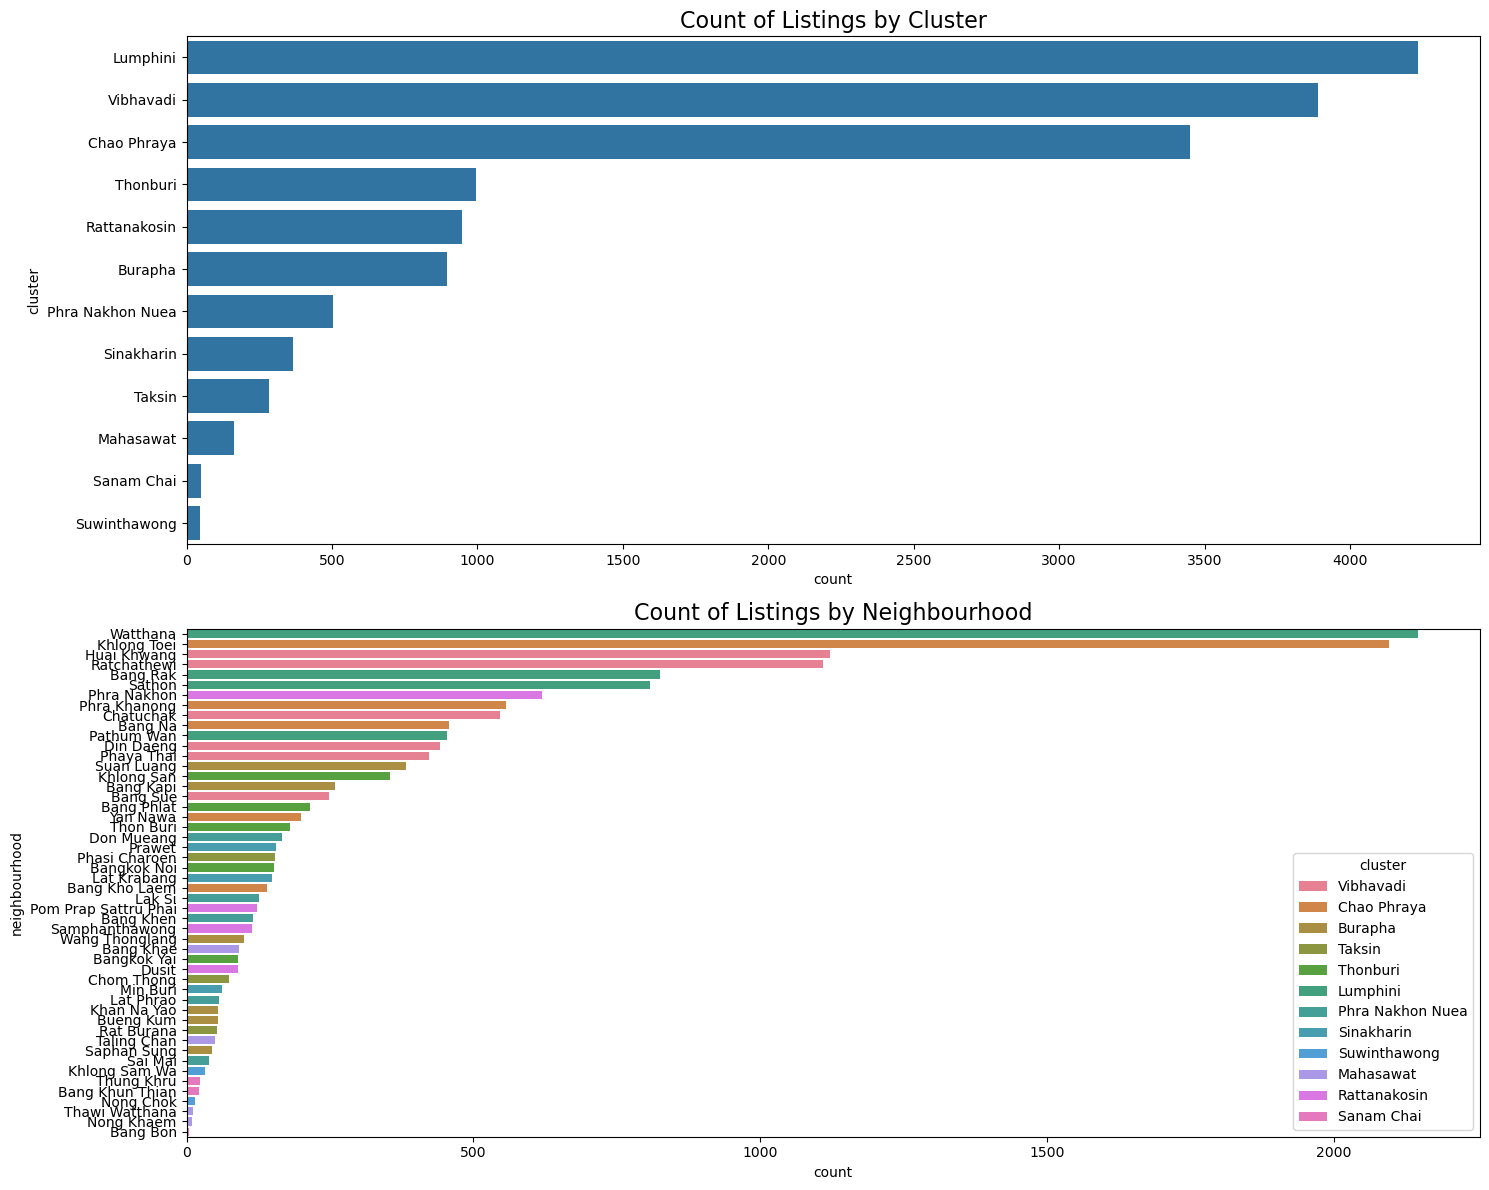

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.countplot(data=df, y='cluster', order=df['cluster'].value_counts().index, ax=ax[0])
sns.countplot(data=df, y='neighbourhood', hue='cluster', order=df['neighbourhood'].value_counts().index, ax=ax[1])

ax[0].set_title('Count of Listings by Cluster', fontsize=16)
ax[1].set_title('Count of Listings by Neighbourhood', fontsize=16)

plt.tight_layout()

Notes:
* Based on cluster, Lumphini, Vhibavadi, & Chao Praya are the top 3 cluster with most listings. 73% of all listings come from these area.
* Based on neighbourhood, Watthana, Khlong Toei are the top 2 neighbourhood with most listings followed by Huai Khwang & Ratchathewi with high number of lisings also.
* In Lumphini, Watthana is the top neighbourhood with high number of listings (≥ 2000) and in Chao Praya, Khlong Toei is the top neighbourhood with high number of listings (≥ 2000).
* While in Vibhavadi, Huai Khwang & Ratchathewi are the top 2 with high number of listings (± 1000).
* Most popular listings seems located in the central bangkok.
* Later, we can check is the number of `is_trending` also align with these numbers or not.

### Count of listings by location & popularity

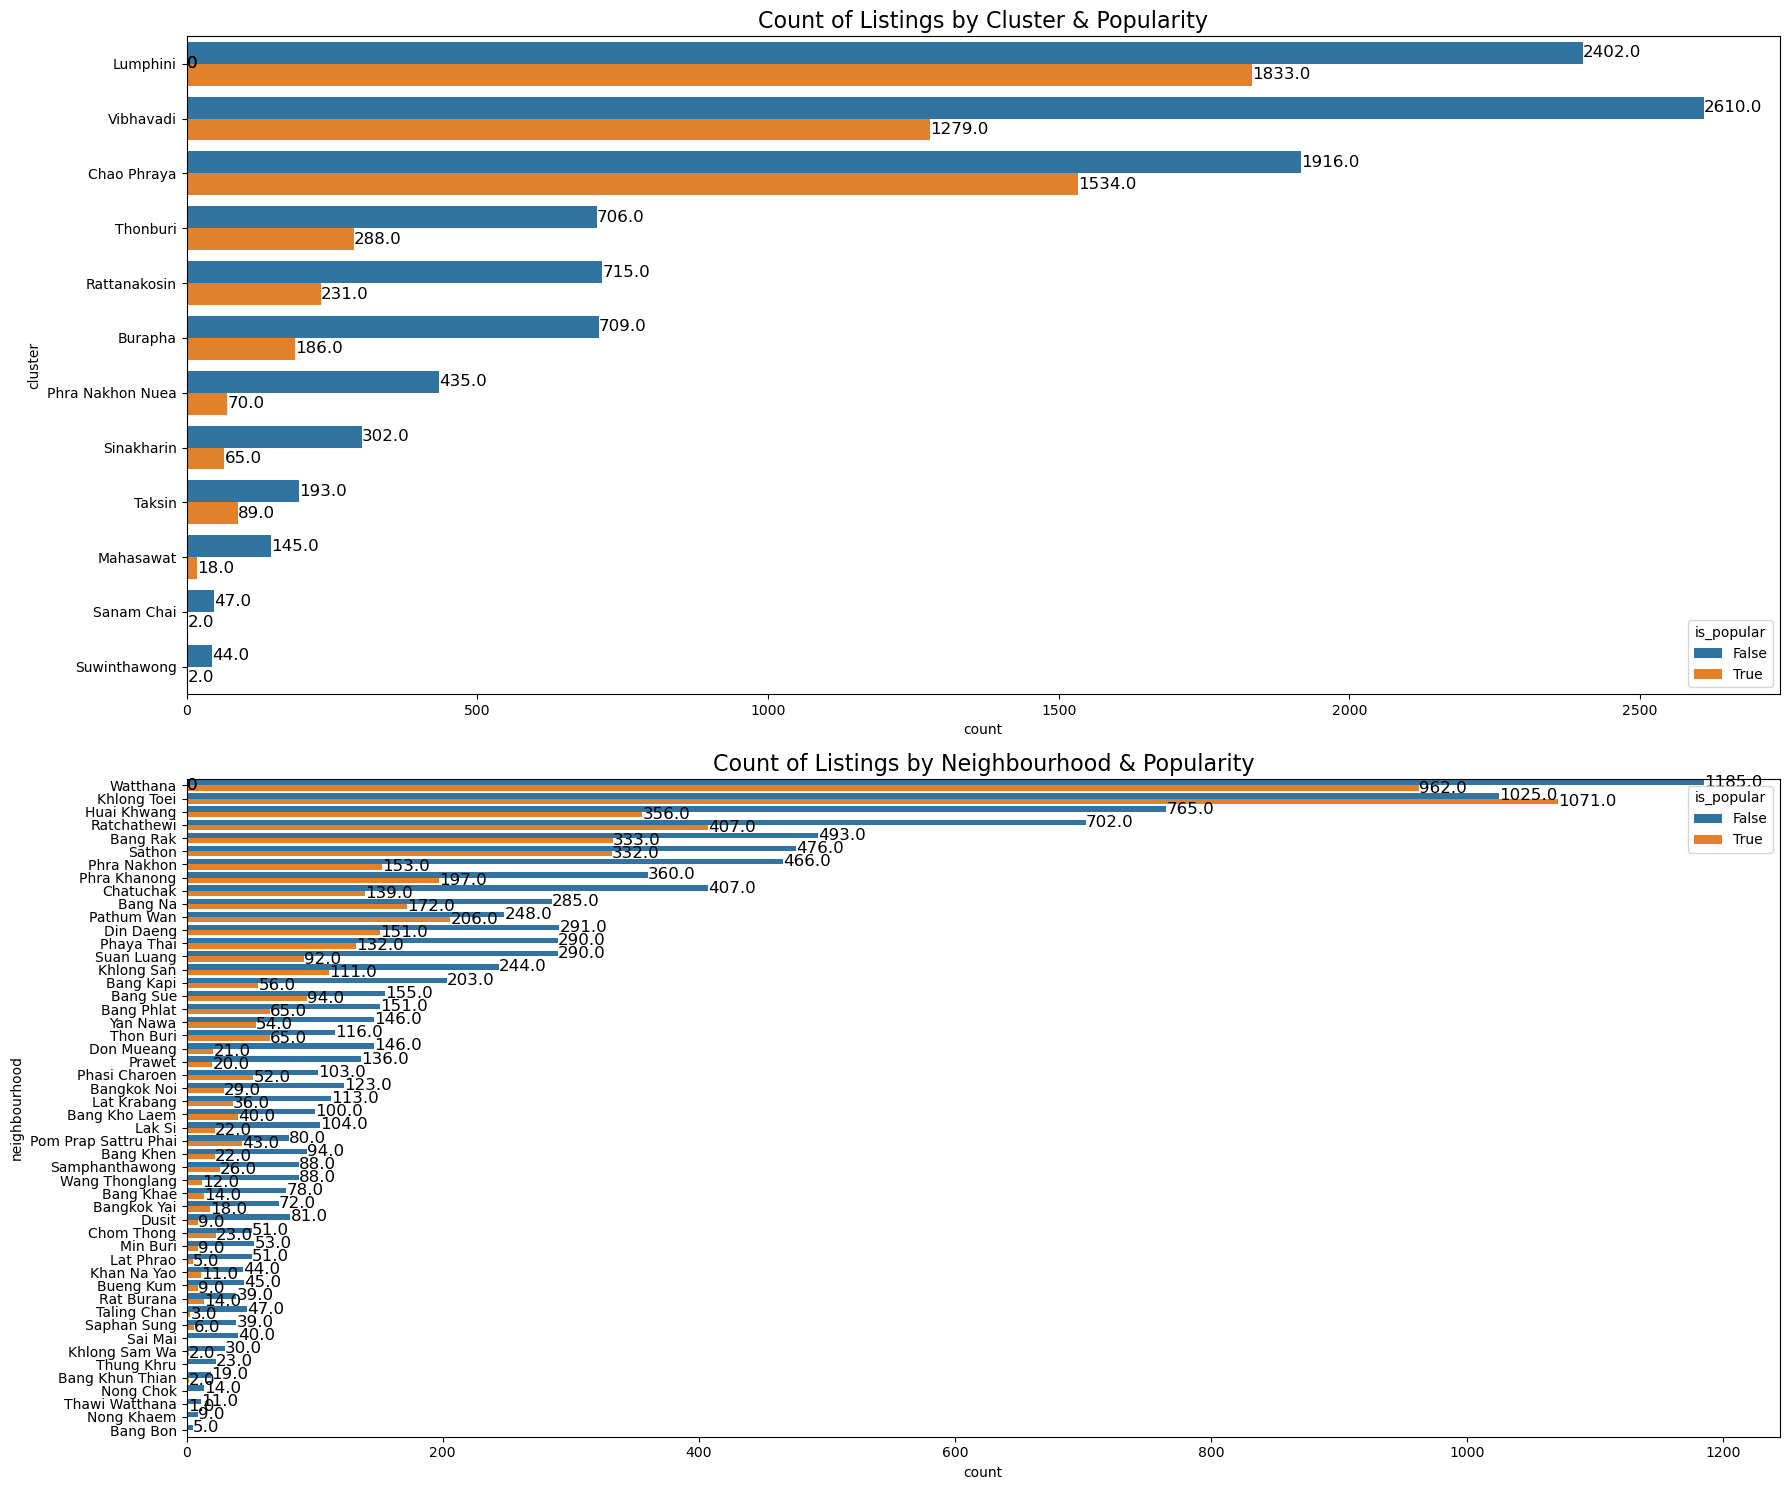

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.countplot(data=df, y='cluster', hue='is_popular', order=df['cluster'].value_counts().index, ax=ax[0])
sns.countplot(data=df, y='neighbourhood', hue='is_popular', order=df['neighbourhood'].value_counts().index, ax=ax[1])

ax[0].set_title('Count of Listings by Cluster & Popularity', fontsize=16)
ax[1].set_title('Count of Listings by Neighbourhood & Popularity', fontsize=16)

for p in ax[0].patches:
    ax[0].annotate(f'{p.get_width()}', 
                   (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), 
                   va='center', fontsize=12)

for p in ax[1].patches:
    ax[1].annotate(f'{p.get_width()}', 
                   (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), 
                   va='center', fontsize=12)

plt.tight_layout()

Notes:
* Based on cluster, from the top 3 most number of listings, Chao Praya & Lumphini have better performance than Vibhavadi.
* In all listings in Chao Praya & Lumphini, around 44% & 43% respectively are popular, while for Vibhavadi only has 32%.
* Based on neighbourhood, Khlong Toei (Chao Praya) has best performance with 51% of all listings there are trending.
* It is also seen that some environments with a large number still have less trending numbers such as Huai Khwang, Ratchathewi, Phra Nakhon & Chatucak.
* There are several reasons for this lack of trending, such as a lack of customer interest or a lack of marketing effort that resulting in a lack of visibility for customers.
* For trending location, most likely the number of trending is driven by tourist attraction. Here are the explaination:
    * Chao Phraya
        * Popular tourist attraction here is Chao Phraya River.
        * This river can take tourists to many cultural sites easily by boat such as the Grand Palace, Wat Pho, Wat Arun, Asiatique, Bangkok National Museum, Koh Kret, etc while bringing a unique experience along the way.
        * There are also unique activities and many restaurant choices that bring new experiences for tourists.
    * Lumphini
        * Known for open green space which attracts tourist for relaxing, such as lumphini park, the largest & most popular in the central bangkok.
        * This place also provide strategic location & ease of accessibility by using BTS Skytrain.
    * Vibhavadi
        * A popular location for business centers.
        * One of the well-known attractions for tourists is Chatuchak Weekend Market, one of the largest markets in the world that offers a wide variety of goods.

### Proportion of room type

([<matplotlib.patches.Wedge at 0x2bc482869f0>,
 [Text(-0.2143181336439019, 1.0789197085934592, 'Entire home/apt'),
  Text(-0.039854468129349715, -1.0992777726171519, 'Private room'),
  Text(1.038423572660719, -0.36287254476268765, 'Hotel room'),
  Text(1.0940733680578092, -0.11403273787225227, 'Shared room')],
 [Text(-0.11690080016940102, 0.5885016592327958, '56.2%'),
  Text(-0.021738800797827116, -0.5996060577911737, '36.4%'),
  Text(0.5664128578149376, -0.19793047896146596, '4.1%'),
  Text(0.5967672916678958, -0.062199675203046687, '3.3%')])

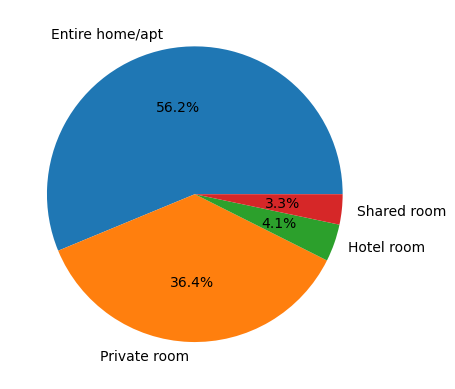

In [50]:
plt.pie(x=df['room_type'].value_counts().values, labels=df['room_type'].value_counts().index, autopct='%1.1f%%')

Note:
* Around 56% of all listings have room type entire home/apt followed by private room with 36%.
* [Here](https://www.airbnb.com/help/article/5) is the explaination for all room type.

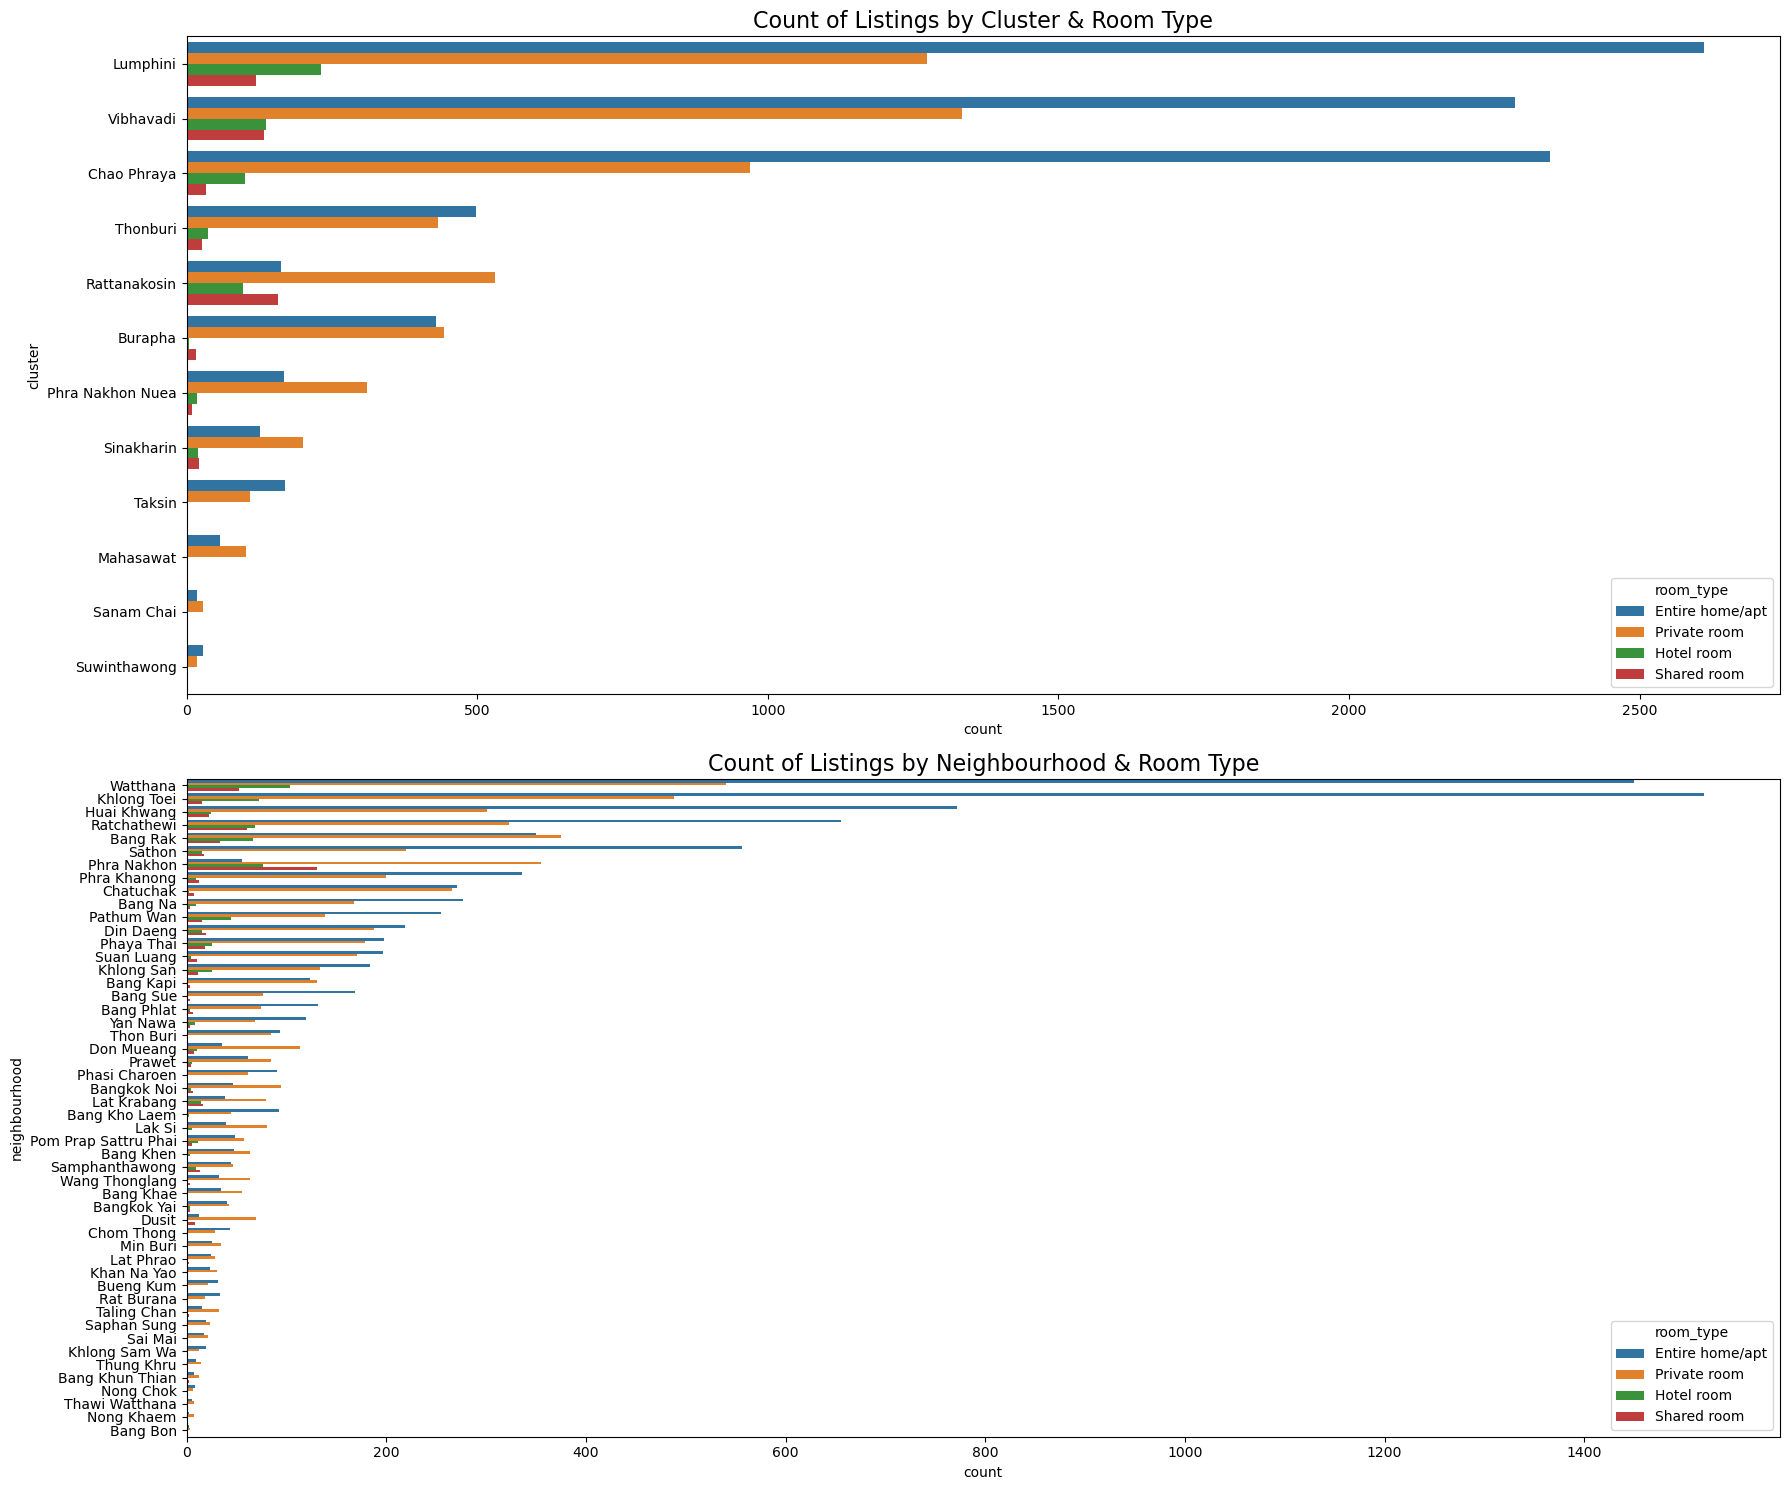

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.countplot(data=df, y='cluster', hue='room_type', order=df['cluster'].value_counts().index, ax=ax[0])
sns.countplot(data=df, y='neighbourhood', hue='room_type', order=df['neighbourhood'].value_counts().index, ax=ax[1])

ax[0].set_title('Count of Listings by Cluster & Room Type', fontsize=16)
ax[1].set_title('Count of Listings by Neighbourhood & Room Type', fontsize=16)

plt.tight_layout()

Notes:
* In other areas outside of central Bangkok, such as Chao Phraya, Lumphini, and Vibhavadi, the proportion of private rooms is quite high, even surpassing other room type.
* There are several reasons why private rooms are likely to offer more affordable accommodation prices, as they don’t require the entire house and provide a bit more privacy for the guests.

### Count of listings by room type & popularity

<Axes: xlabel='room_type', ylabel='count'>

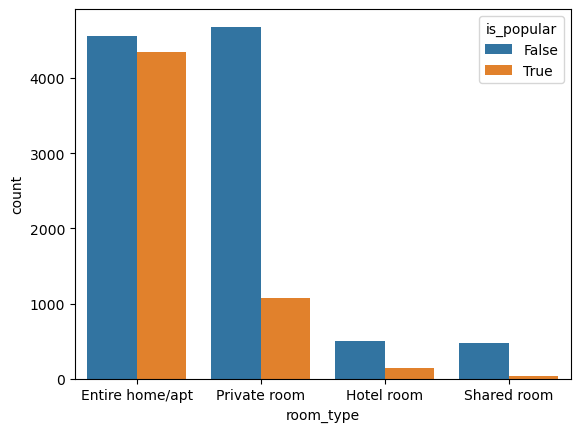

In [52]:
sns.countplot(data=df, x='room_type', hue='is_popular')

Notes:
* Although private rooms are the second most numerous type of accommodation, the most frequently chosen option by guests is entire homes/apartments.
* Some reasons for this preference include full privacy, which provides comfort.
* They are more economical than choosing a hotel & suitable for families that need more space.

### Count of popular listings by cluster & room type

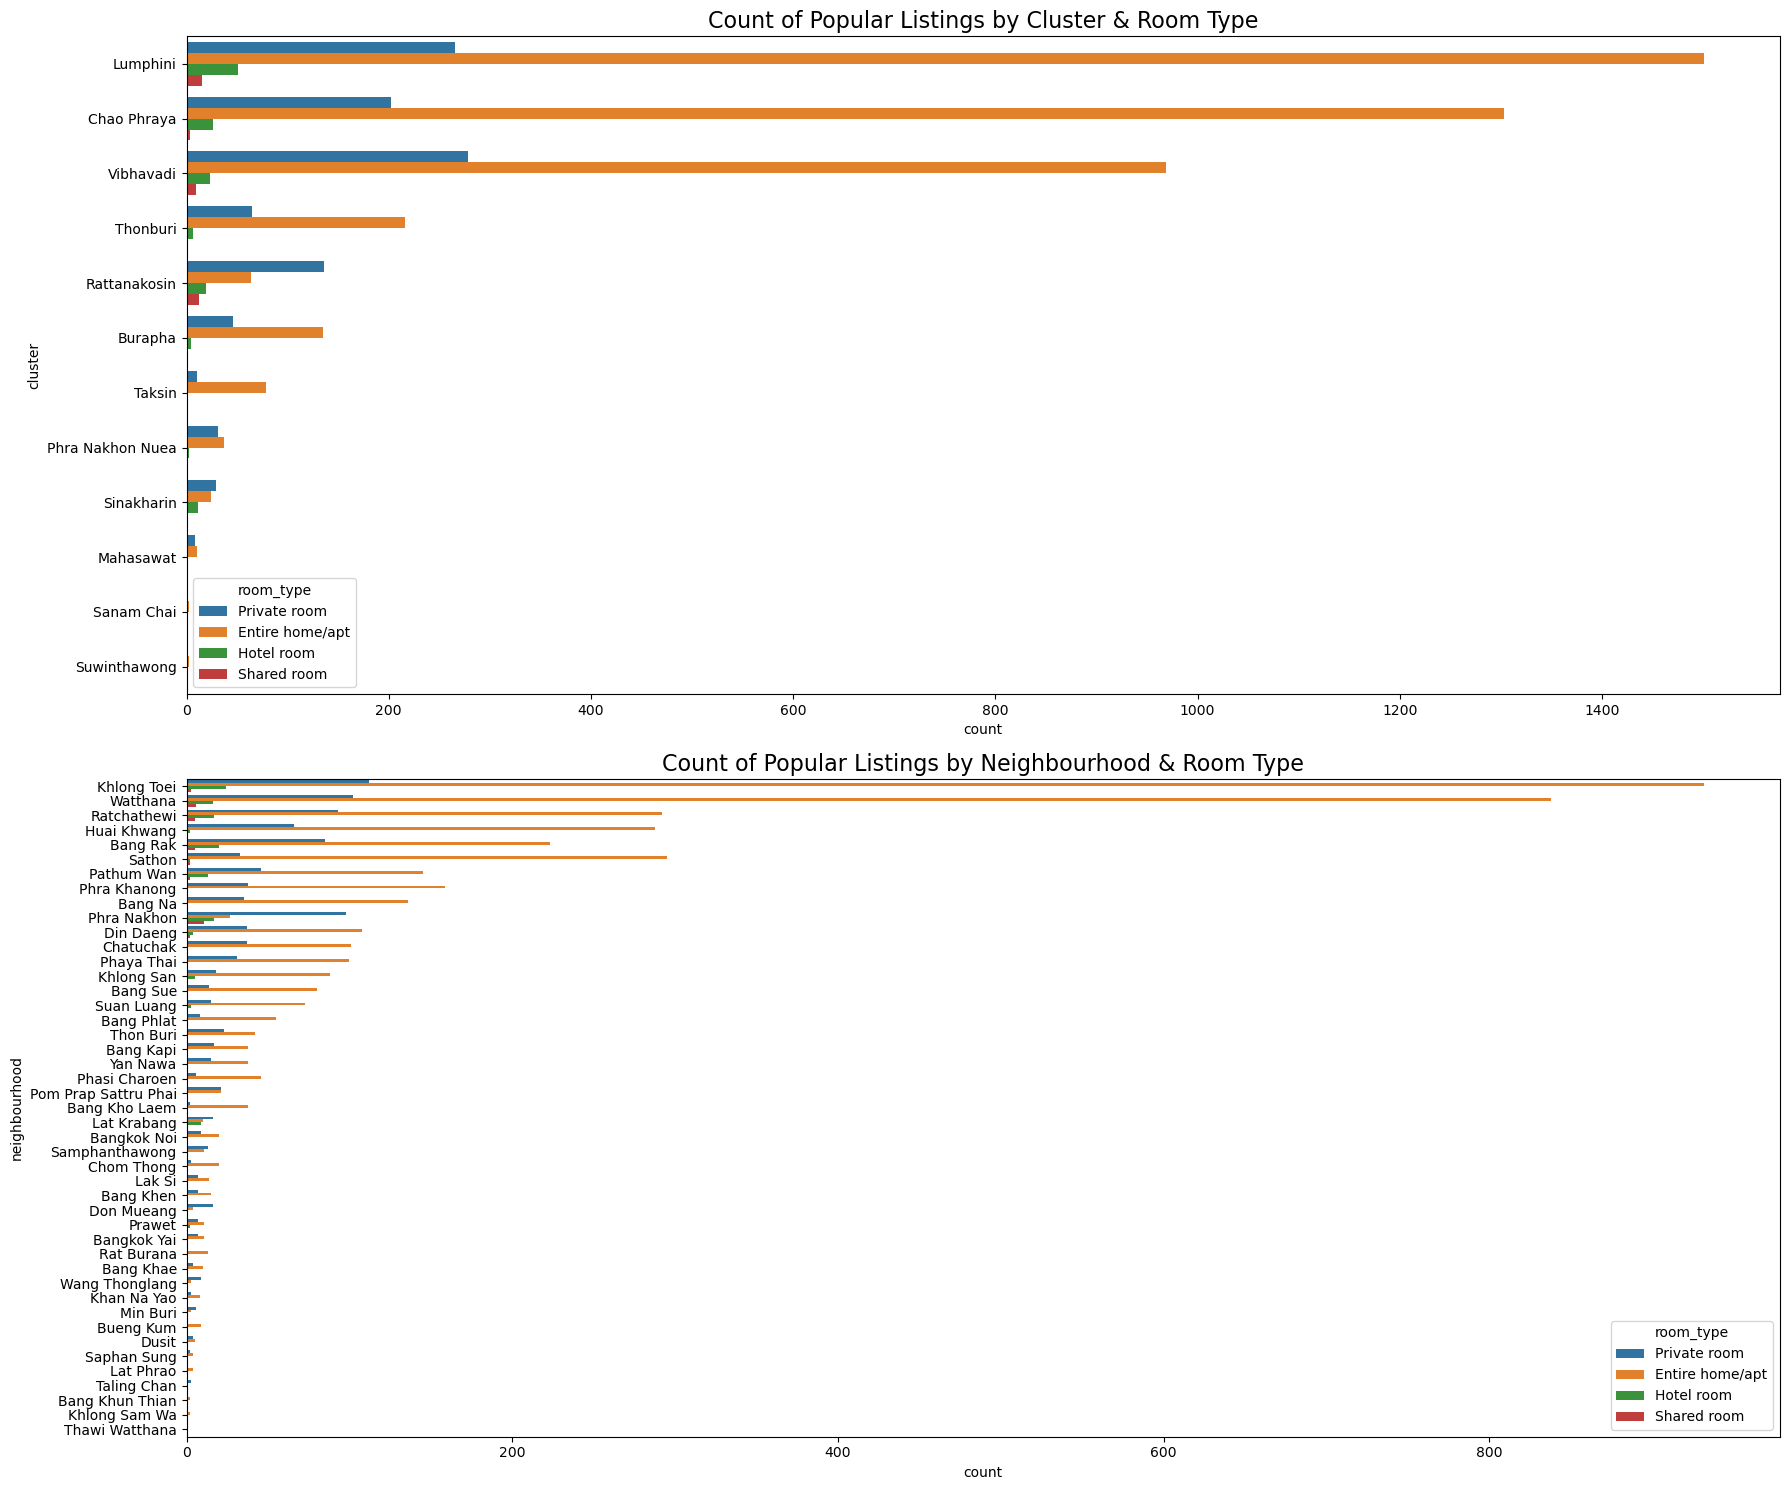

In [53]:
df_popular = df.loc[df['is_popular'] == True]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.countplot(data=df_popular, y='cluster', hue='room_type', order=df_popular['cluster'].value_counts().index, ax=ax[0])
sns.countplot(data=df_popular, y='neighbourhood', hue='room_type', order=df_popular['neighbourhood'].value_counts().index, ax=ax[1])

ax[0].set_title('Count of Popular Listings by Cluster & Room Type', fontsize=16)
ax[1].set_title('Count of Popular Listings by Neighbourhood & Room Type', fontsize=16)

plt.tight_layout()

Notes:
* Although certain locations have a higher number of private rooms, most of the guests still prefer entire homes/apartments.
* Only in Rattanakosin, a cluster where private rooms are more prevalent.

([<matplotlib.patches.Wedge at 0x2bc49964650>,
 [Text(-0.9310686346044259, 0.5857569441806473, 'Short-Term'),
  Text(0.931068689446945, -0.5857568570077082, 'Long-Term')],
 [Text(-0.5078556188751414, 0.3195037877348985, '82.1%'),
  Text(0.5078556487892426, -0.3195037401860226, '17.9%')])

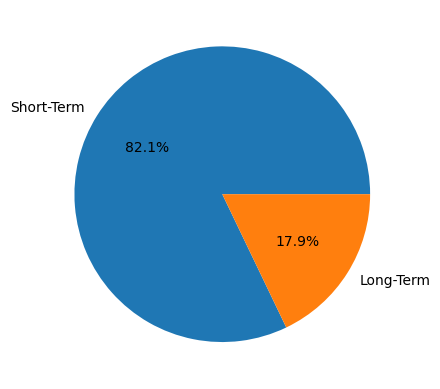

In [54]:
plt.pie(x=df['minimum_nights_group'].value_counts().values, labels=df['minimum_nights_group'].value_counts().index, autopct='%1.1f%%')

Note:
* Most of the listings here offers for short-term stay.

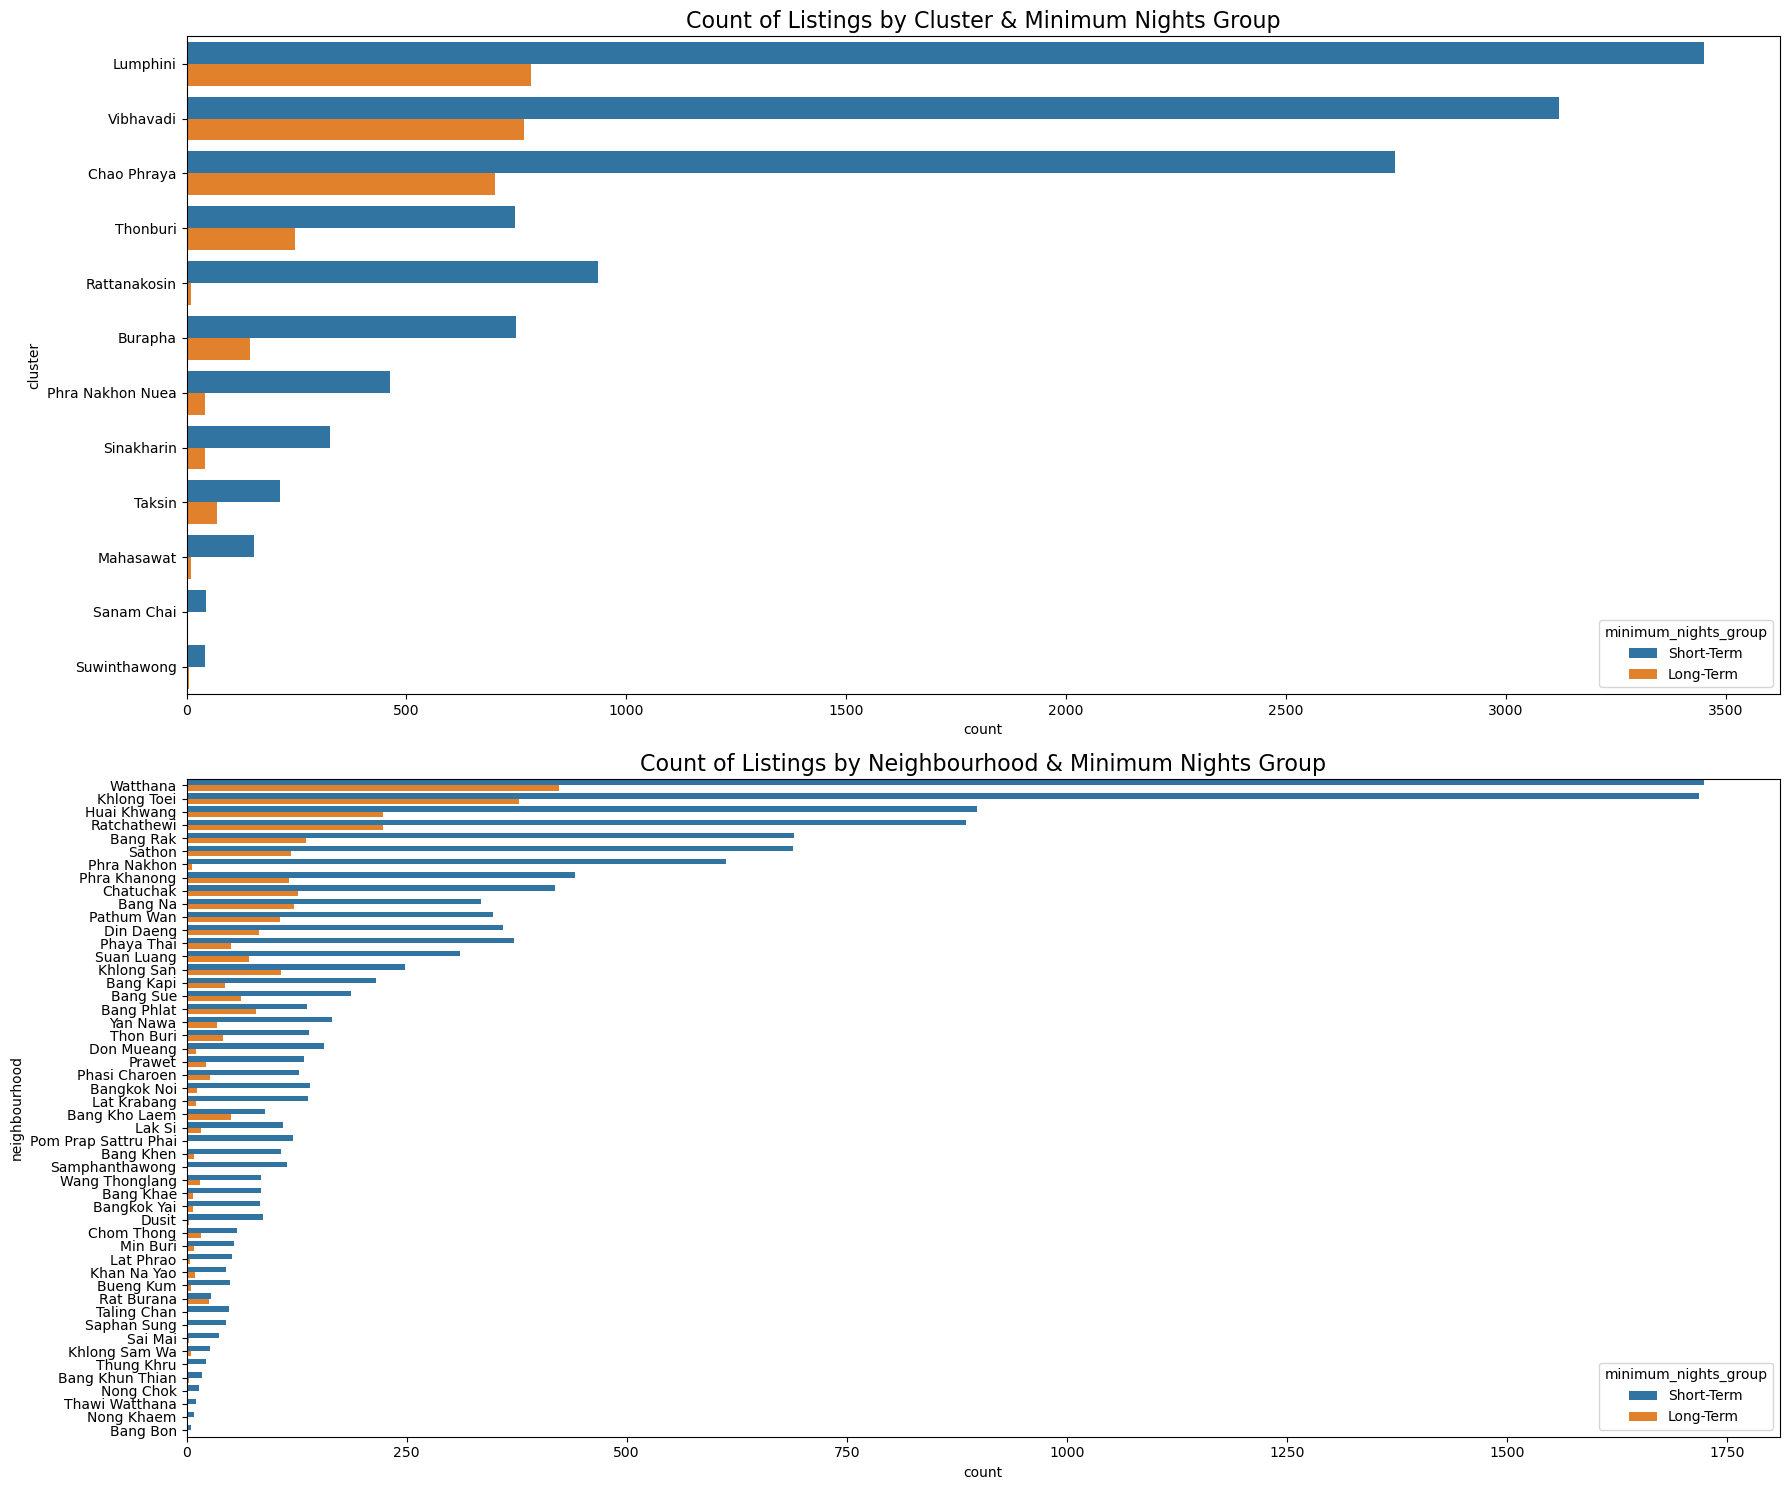

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.countplot(data=df, y='cluster', hue='minimum_nights_group', order=df['cluster'].value_counts().index, ax=ax[0])
sns.countplot(data=df, y='neighbourhood', hue='minimum_nights_group', order=df['neighbourhood'].value_counts().index, ax=ax[1])

ax[0].set_title('Count of Listings by Cluster & Minimum Nights Group', fontsize=16)
ax[1].set_title('Count of Listings by Neighbourhood & Minimum Nights Group', fontsize=16)

plt.tight_layout()

Notes:
* Both by cluster and neighborhood, the majority of listings offer short-term stays.
* Rattanakosin is the cluster with the lowest proportion of long-term stays.

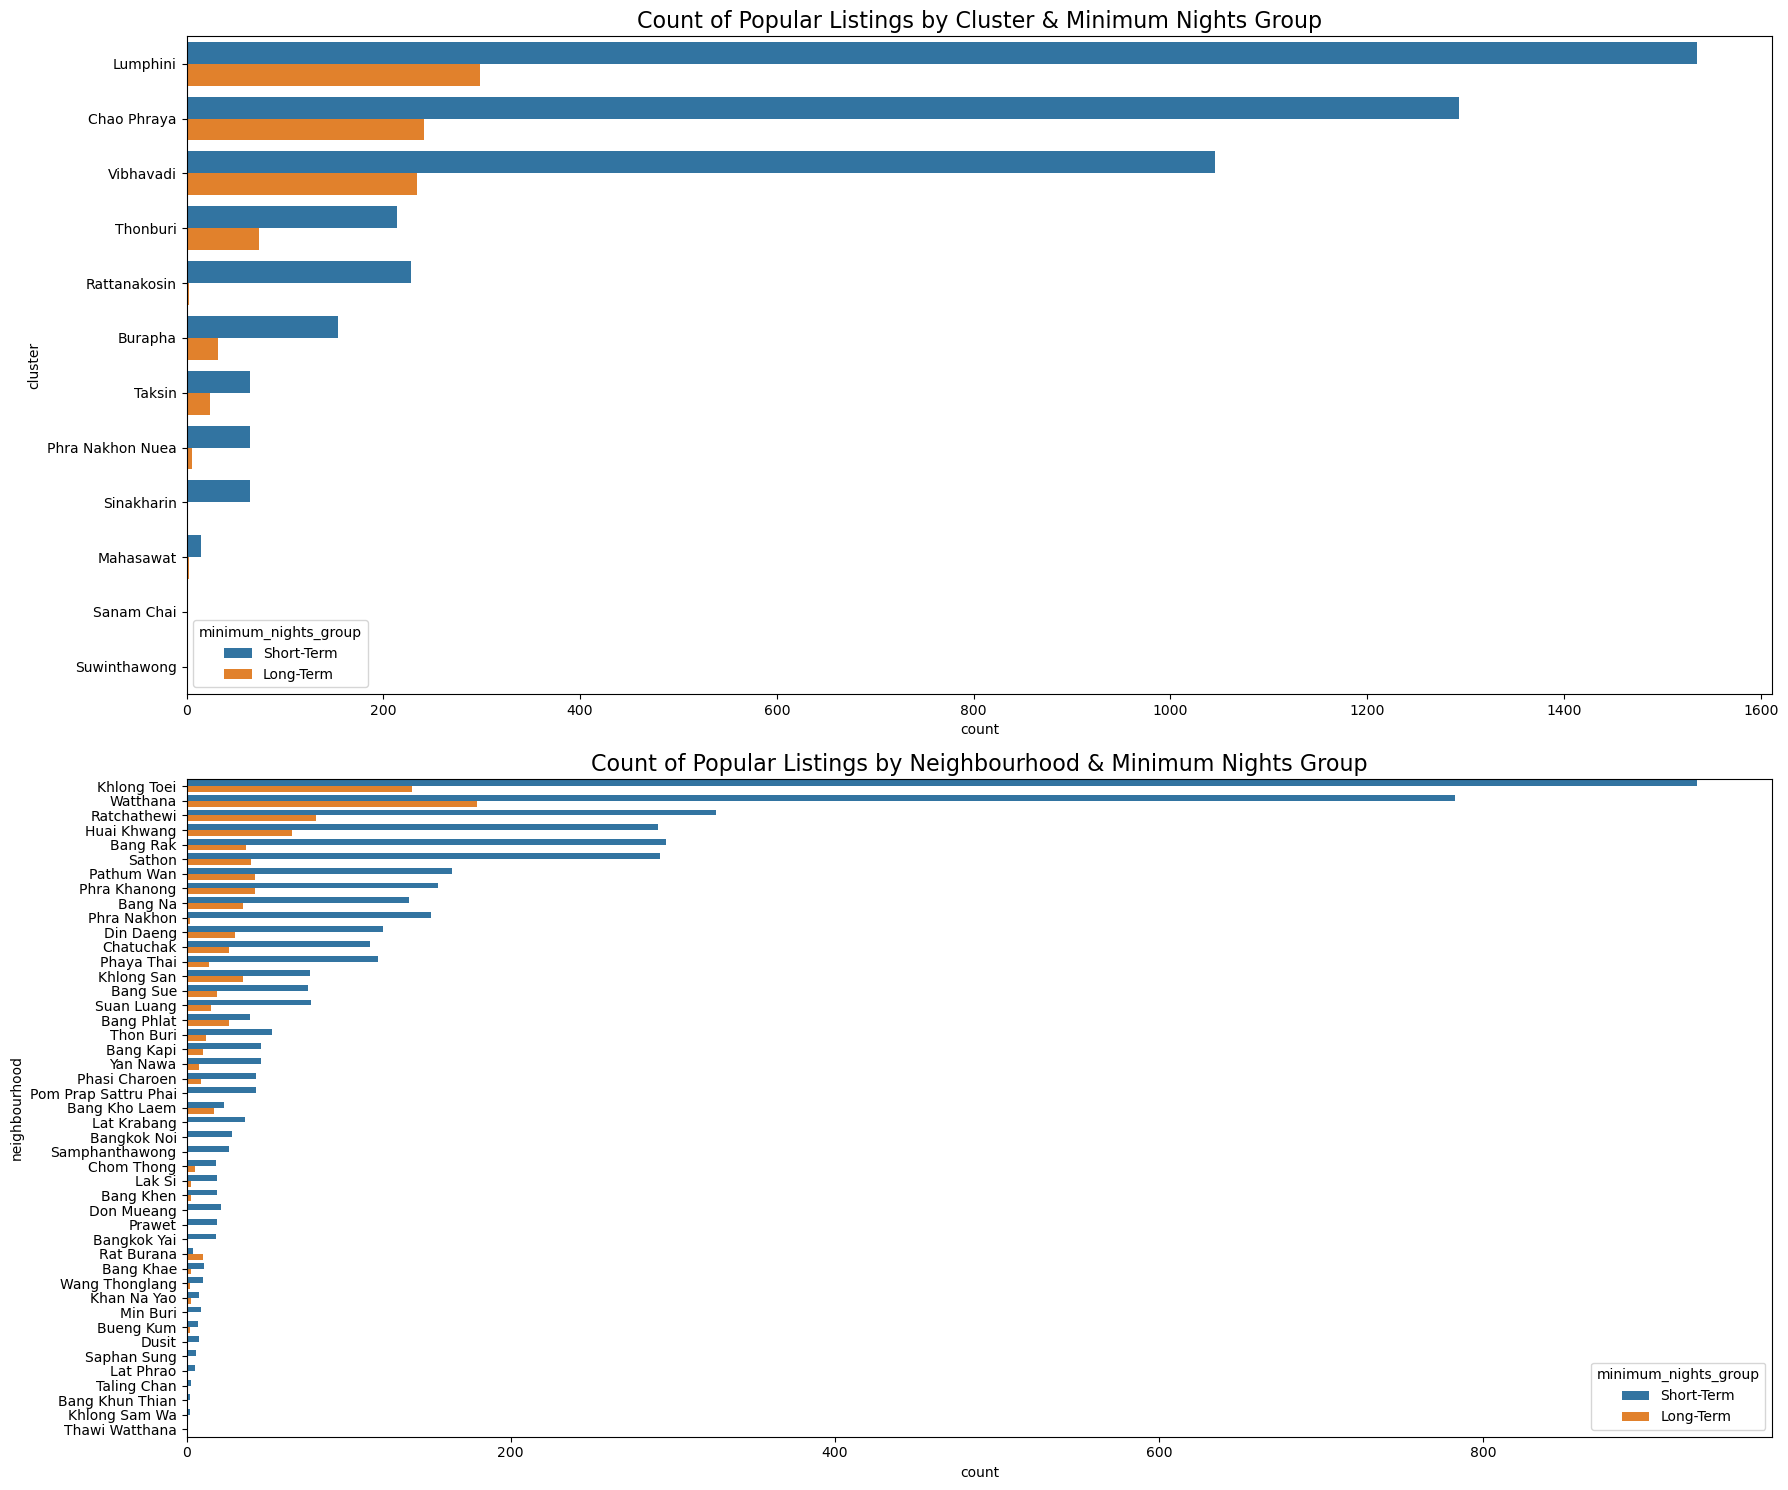

In [56]:
df_trend = df.loc[df['is_popular'] == True]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.countplot(data=df_trend, y='cluster', hue='minimum_nights_group', order=df_trend['cluster'].value_counts().index, ax=ax[0])
sns.countplot(data=df_trend, y='neighbourhood', hue='minimum_nights_group', order=df_trend['neighbourhood'].value_counts().index, ax=ax[1])

ax[0].set_title('Count of Popular Listings by Cluster & Minimum Nights Group', fontsize=16)
ax[1].set_title('Count of Popular Listings by Neighbourhood & Minimum Nights Group', fontsize=16)

plt.tight_layout()

Note:
* The results are consistent, showing that the most popular listings are predominantly for short-term stays.

### Distribution of prices by popularity

<Axes: ylabel='price'>

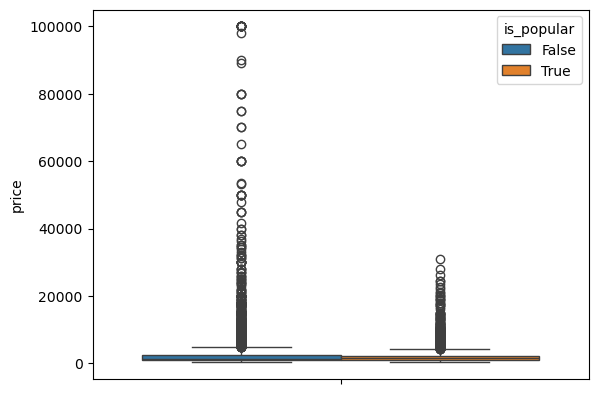

In [57]:
sns.boxplot(data=df, y='price', hue='is_popular')

Notes:
* It seems that at a certain price point, if it is too high, guests tend to avoid choosing those very expensive listings.
* We can conduct statistical test later to gain clearer understanding.

In [58]:
df.loc[df['price'] > 37000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,name_cleaned,is_name_en,is_contains_location,is_contains_accesibility,is_contains_place,is_contains_feature,is_contains_excellence,minimum_nights_group,approx_occupancy_rate,is_popular
392,4450156,"Stylish Apartment in Bangkok, MRT",23095883,Thanakrit,Huai Khwang,13.75595,100.56780,Entire home/apt,100000,365.0,...,stylish apartment in bangkok mrt,True,True,True,False,False,True,Long-Term,0.00,False
861,6855235,HYDE Sukhumvit 13 Condomidium,35923444,Khunnee,Khlong Toei,13.73959,100.55522,Private room,45000,365.0,...,hyde sukhumvit 13 condomidium,True,True,False,False,False,False,Long-Term,0.00,False
874,6874847,HYDE Sukhumvit Condominium,35923444,Khunnee,Watthana,13.73938,100.55745,Entire home/apt,45000,180.0,...,hyde sukhumvit condominium,True,True,False,False,False,True,Long-Term,0.00,False
1373,10241461,Kao Yai Trip,50182388,Julee,Thon Buri,13.69534,100.48597,Private room,60000,1.0,...,kao yai trip,True,False,False,False,False,False,Short-Term,50.96,False
1987,13067172,Mini Suite strong wifi H shower twn bed.WC pantry,72420017,Surapong,Bang Khen,13.84927,100.64539,Private room,49920,1.0,...,mini suite strong wifi h shower twn bedwc pantry,True,False,False,False,True,True,Short-Term,75.34,False
2259,14478285,1 Bedroom Apartment,89279775,Oakwood Residence Sukhumvit Thonglo,Watthana,13.73600,100.58181,Private room,39900,1.0,...,1 bedroom apartment,True,False,False,False,False,False,Short-Term,1.10,False
2432,15134115,Cozy 2Beds only 5 min walk to BTS unblocked view!!,95959689,Risa,Khlong Toei,13.71547,100.58528,Private room,60000,30.0,...,cozy 2beds only 5 min walk to bts unblocked view,True,False,True,False,False,True,Long-Term,0.27,False
2514,15742265,Quiet Canal Oasis Apartment very near BTS,65103949,Huakuay,Watthana,13.71380,100.60125,Private room,98000,1.0,...,quiet canal oasis apartment very near bts,True,False,True,False,False,True,Short-Term,50.68,False
2854,17081822,Twins beds strong wifi WC shower inside calm area,72420017,Surapong,Bang Khen,13.85006,100.64535,Private room,50000,1.0,...,twins beds strong wifi wc shower inside calm area,True,True,False,False,True,False,Short-Term,75.62,False
3404,18917181,PST Tower 1,131852796,Patnaree,Sathon,13.71131,100.53700,Entire home/apt,40000,1.0,...,pst tower 1,True,False,False,False,False,False,Short-Term,0.00,False


Notes:
* Some listing name with expensive price (> 37000) contain words like condo, villa, resort, etc.
* But there are some name that don't contain those words too.

### Statistical test
To gain a clearer understanding about "are low-priced listings more likely to be chosen than expensive ones?", we can perform a statistical test using either the Mann-Whitney U test or ANOVA based on the distribution. First, we should conduct D’Agostino & Pearson's Normality Test to know the distribution.

In [59]:
stats, p = normaltest(df['price'])

if p <= 0.05:
    print('Sample does not look gaussian (reject H0)')
else: 
    print('Sample looks gaussian (fail to reject H0)')

Sample does not look gaussian (reject H0)


In [60]:
u_statistic, p = mannwhitneyu(df[df['is_popular'] == True]['price'], df[df['is_popular'] == False]['price'], alternative='less')

if p <= 0.05:
    print('There is significant evidence that low-priced listings are more likely to be chosen than expensive ones (reject H0)')
else:
    print('There is not enough evidence to conclude that low-priced listings are more likely to be chosen than expensive ones (fail to reject H0)')

There is not enough evidence to conclude that low-priced listings are more likely to be chosen than expensive ones (fail to reject H0)


Note:
* This implies that factors other than price may influence booking decisions, or that pricing alone does not significantly affect the likelihood of selection among the listings considered.

## Factors influencing pricing

In this section, I aim to explore the various factors that may influence the pricing of listings. Understanding these factors is crucial for developing pricing recommendations to address issues of underpriced or overpriced listings. There are several key questions to address:
* Are there numerical variables that significantly affect listing prices?
* How does the price distribution vary by location? Are there significant influences based on location?
* What is the price distribution based on room type? Are there significant influences based on room type?

### Correlation between price with other numerical variables

<Axes: >

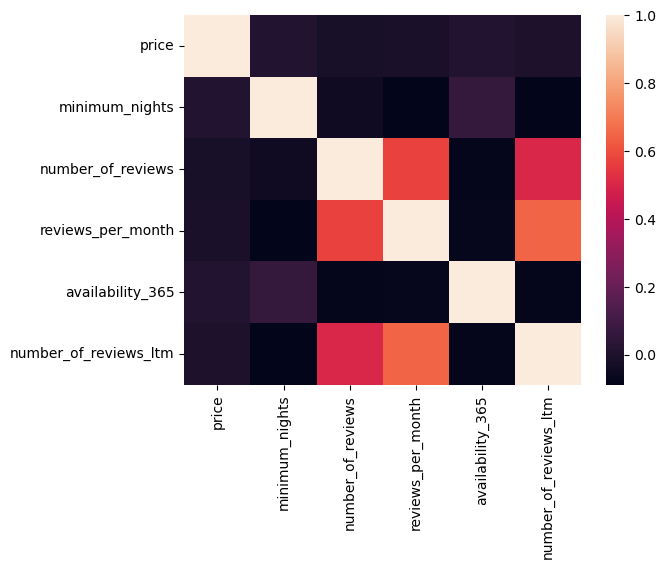

In [61]:
sns.heatmap(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'number_of_reviews_ltm']].corr())

Notes:
* No strong correlation was found with price.
* A strong correlation was only identified with variables related to reviews.

### Median price of listings by location

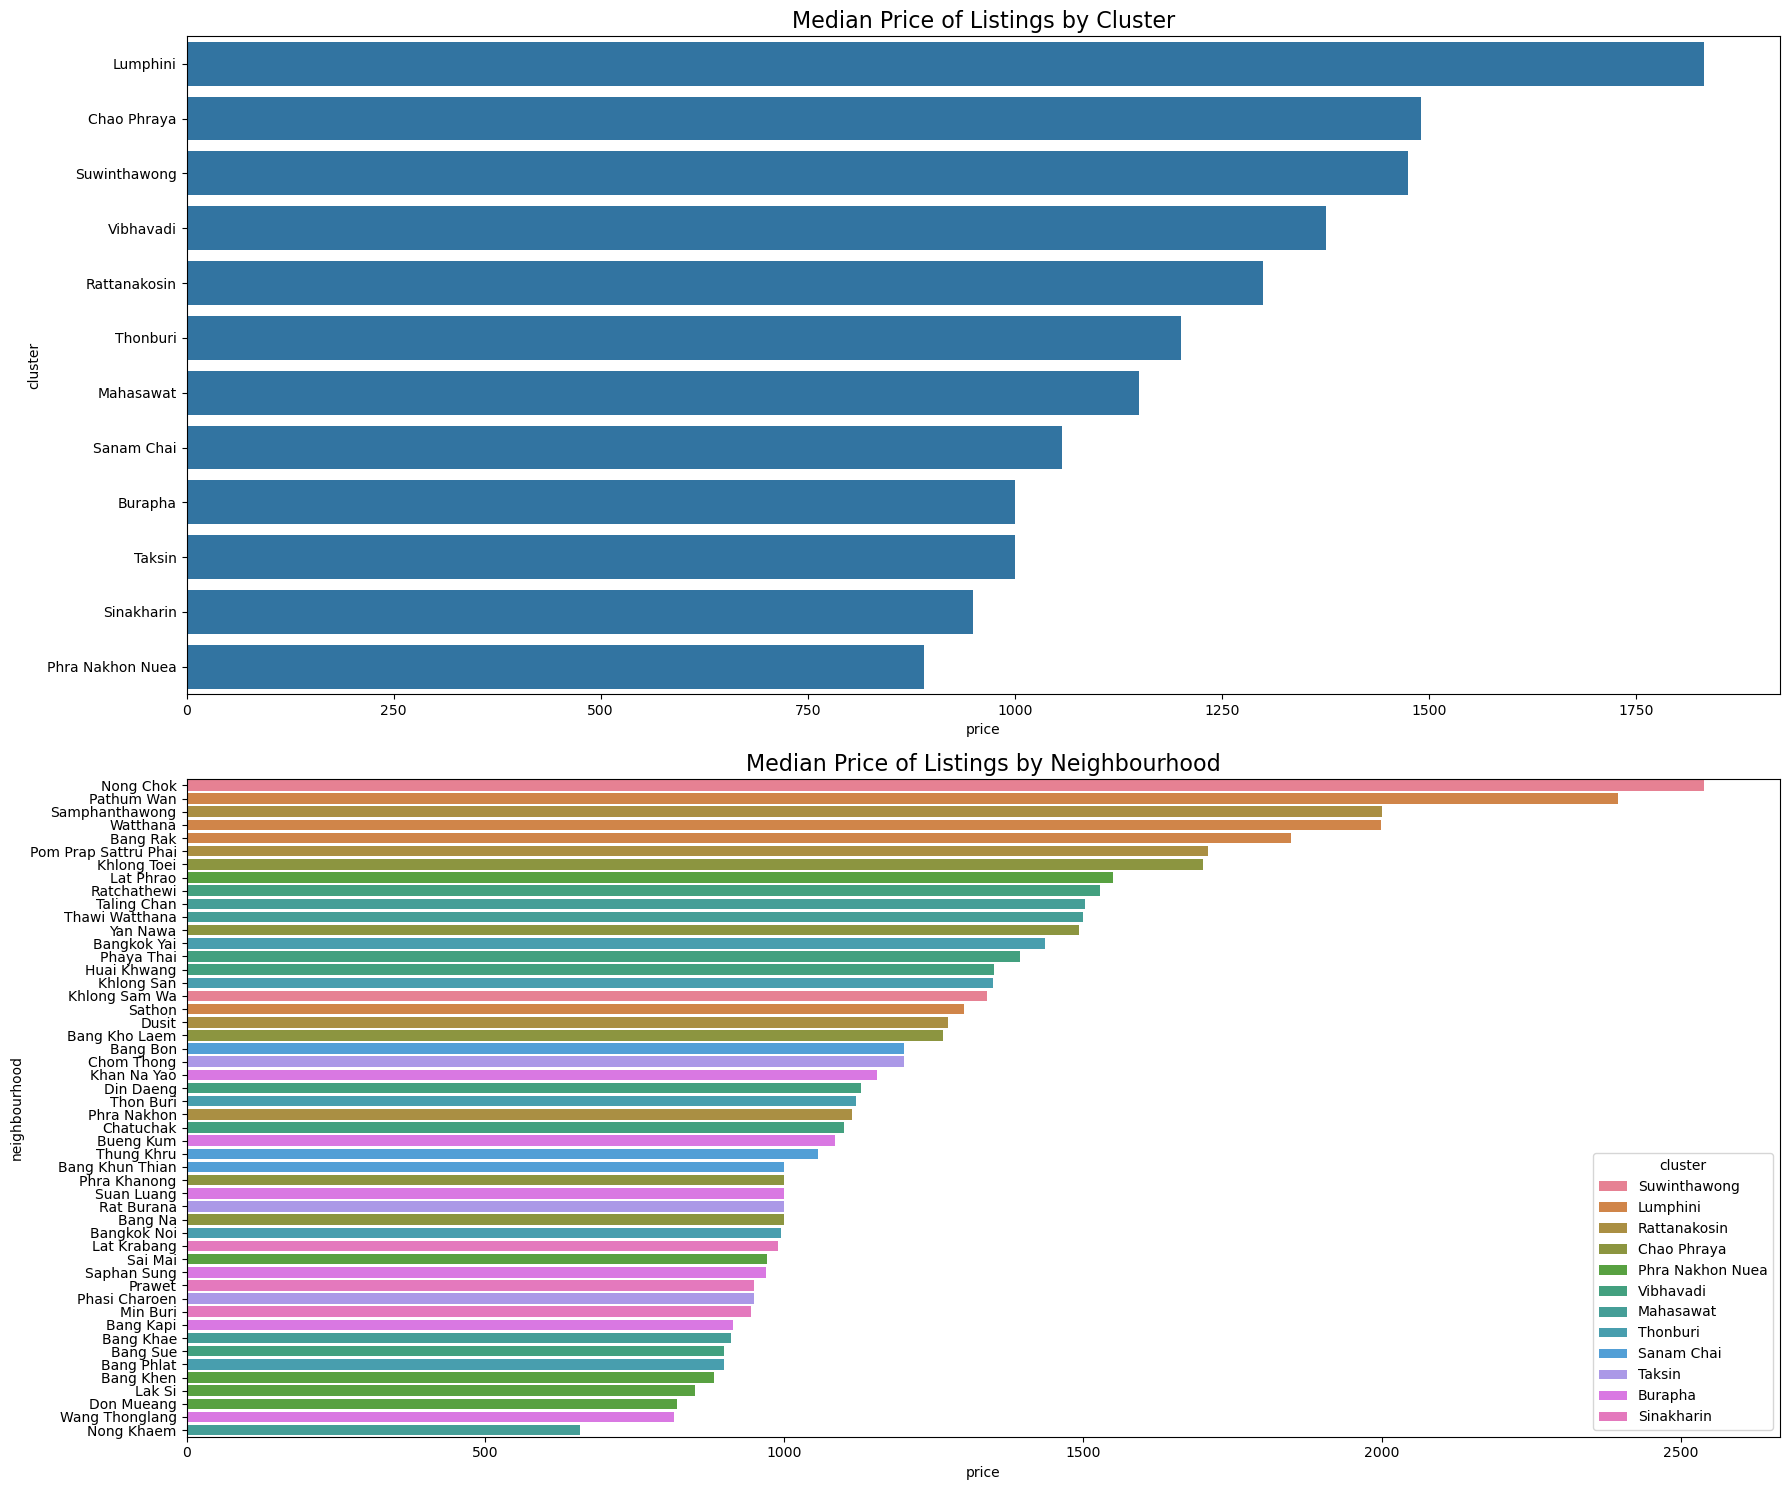

In [62]:
median_cluster = df.groupby('cluster')['price'].median().reset_index().sort_values(by='price', ascending=False)
median_neighbourhood = df.groupby(['neighbourhood', 'cluster'])['price'].median().reset_index().sort_values(by='price', ascending=False)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.barplot(data=median_cluster, y='cluster', x='price', estimator='median', ax=ax[0])
sns.barplot(data=median_neighbourhood, y='neighbourhood', x='price', hue='cluster', estimator='median', ax=ax[1])

ax[0].set_title('Median Price of Listings by Cluster', fontsize=16)
ax[1].set_title('Median Price of Listings by Neighbourhood', fontsize=16)

plt.tight_layout()

Notes:
* Lumphini is the cluster with the highest median price, significantly more than the second highest, Chao Phraya.
* Nong Chok neighbourhood has the highest median price, followed by Pathum Wan (Lumphini) and the neighbourhood from Suwinthawong (lowest number of listings).

### Median price of listings by location & popularity

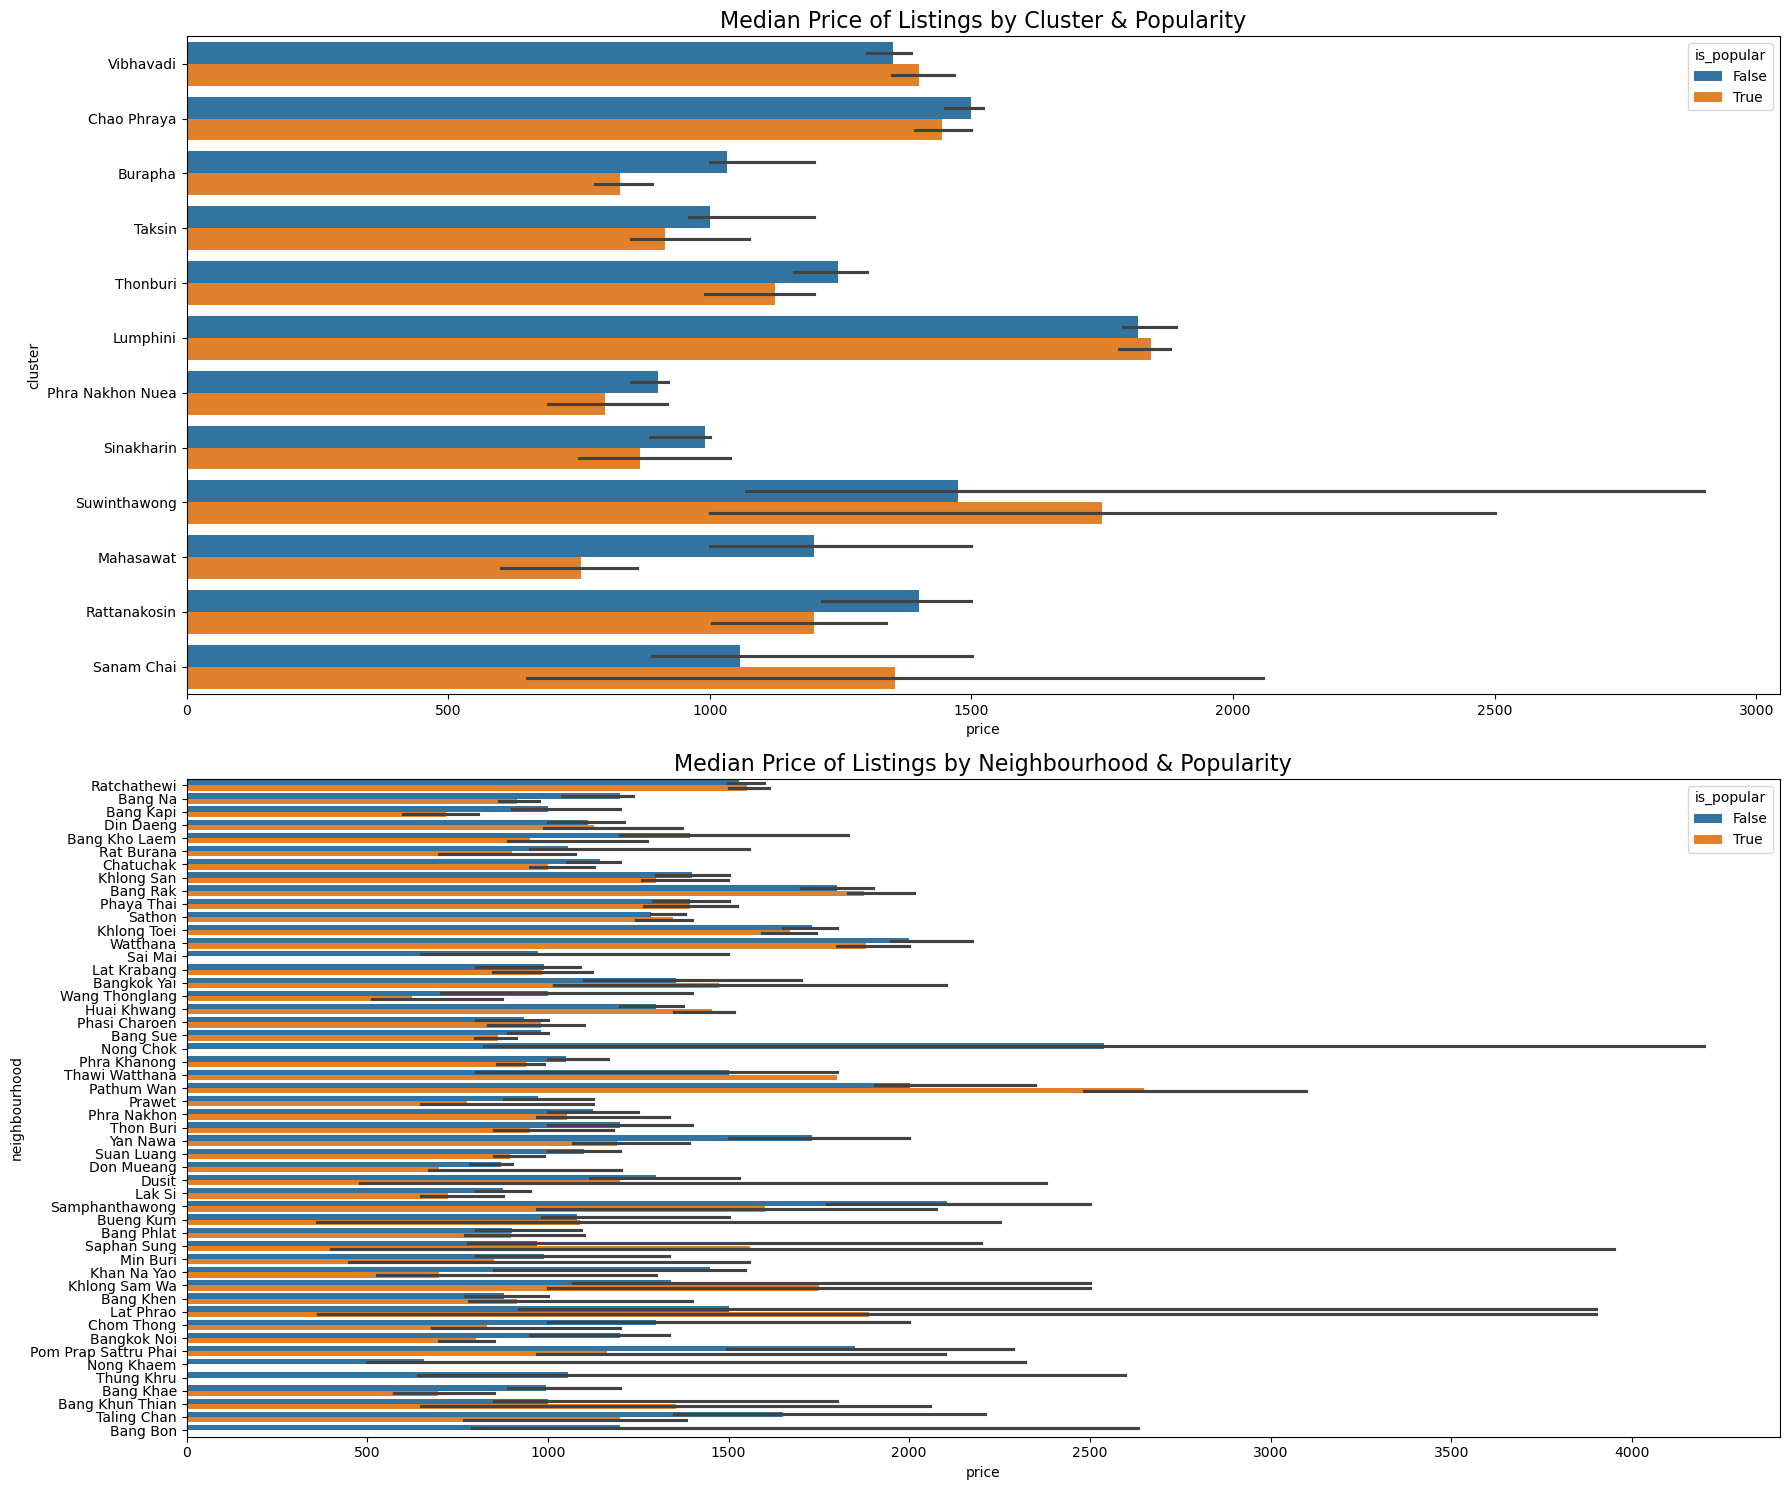

In [63]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.barplot(data=df, y='cluster', x='price', hue='is_popular', estimator='median', ax=ax[0])
sns.barplot(data=df, y='neighbourhood', x='price', hue='is_popular', estimator='median', ax=ax[1])

ax[0].set_title('Median Price of Listings by Cluster & Popularity', fontsize=16)
ax[1].set_title('Median Price of Listings by Neighbourhood & Popularity', fontsize=16)

plt.tight_layout()

Notes:
* The median prices for popular listings are not consistently lower than those for non-popular listings, which may indicate that price is not a significant concern for guests.
* For example, both Lumphini and Suwinthawong have higher median prices for popular listings compared to their non-popular counterparts.

### Statistical test

In [64]:
stat, p = kruskal(*[df[df['cluster'] == val]['price'] for val in df['cluster'].unique()])

if p <= 0.05:
    print('There are significant differences in prices across clusters (reject H0)')
else:
    print('There are no significant differences in prices across clusters (fail to reject H0')

There are significant differences in prices across clusters (reject H0)


In [65]:
stat, p = kruskal(*[df[df['neighbourhood'] == val]['price'] for val in df['neighbourhood'].unique()])

if p <= 0.05:
    print('There are significant differences in prices across neighbourhoods (reject H0)')
else:
    print('There are no significant differences in prices across neighbourhoods (fail to reject H0')

There are significant differences in prices across neighbourhoods (reject H0)


Note:
* The significant differences in prices by location imply that factors related to clusters and neighborhoods influence pricing.

### Median price of listings by room types

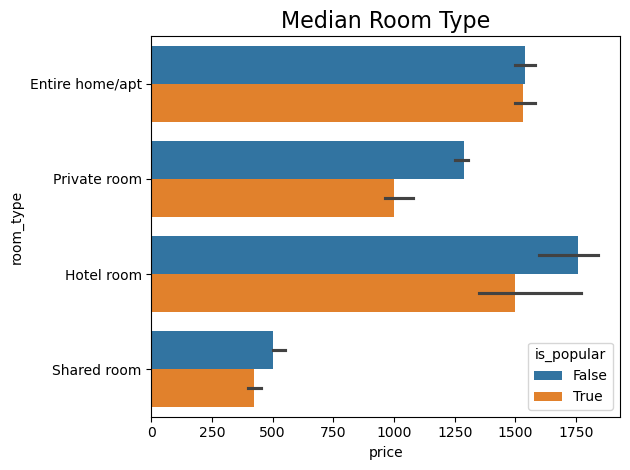

In [66]:
sns.barplot(data=df, y='room_type', x='price', hue='is_popular', estimator='median')

plt.title('Median Room Type', fontsize=16)

plt.tight_layout()

### Statistical test

In [67]:
stat, p = kruskal(*[df[df['room_type'] == val]['price'] for val in df['room_type'].unique()])

if p <= 0.05:
    print('There are significant differences in prices across room types (reject H0)')
else:
    print('There are no significant differences in prices across room types (fail to reject H0')

There are significant differences in prices across room types (reject H0)


Note:
* This imply that factors related to room types influence pricing.

## Growing popularity

### Count of listing by name & popularity

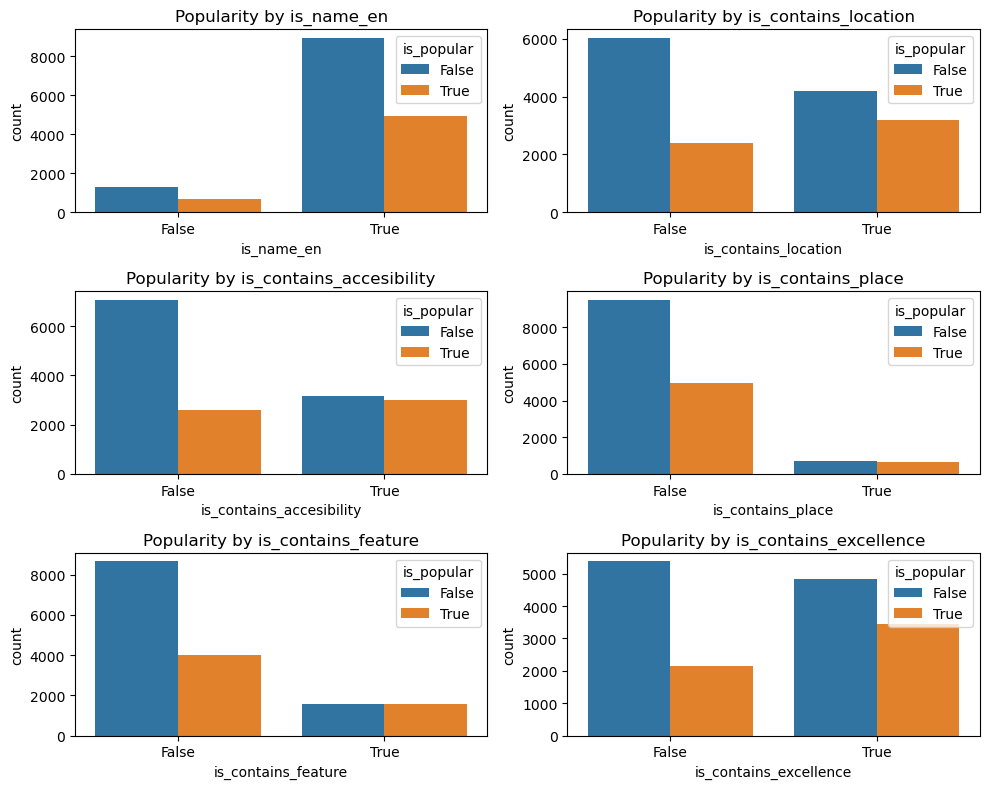

In [68]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

axes = ax.flatten()

columns = ['is_name_en', 'is_contains_location', 'is_contains_accesibility', 'is_contains_place', 'is_contains_feature', 'is_contains_excellence']

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, hue='is_popular', ax=axes[i])
    axes[i].set_title(f'Popularity by {col}')

plt.tight_layout()
plt.show()

Notes:
* It seems that the proportion of listings with certain keywords is greater than those without keywords.
* We can investigate whether there is a relationship between these keywords and popularity by conducting a statistical test later.

### Median of number of reviews in the last 12 months among name

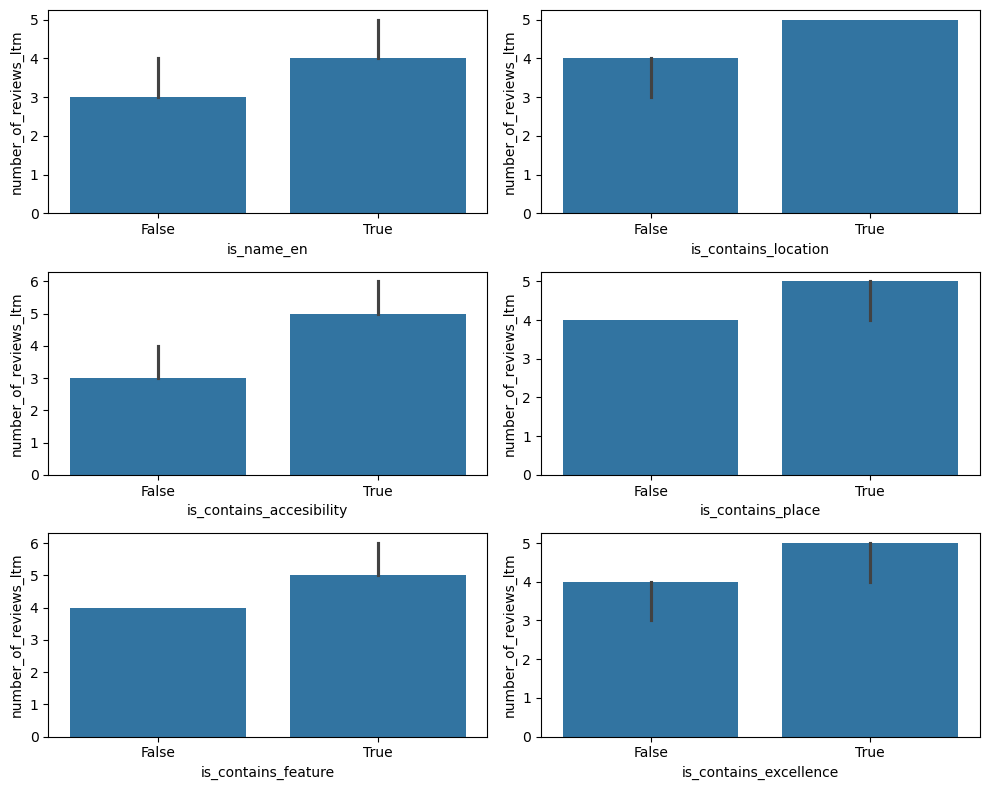

In [69]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

axes = ax.flatten()

columns = ['is_name_en', 'is_contains_location', 'is_contains_accesibility', 'is_contains_place', 'is_contains_feature', 'is_contains_excellence']

df_trend = df.loc[df['number_of_reviews_ltm'] > 0]

for i, col in enumerate(columns):
    sns.barplot(data=df_trend, x=col, y='number_of_reviews_ltm', estimator='median', ax=axes[i])
    #axes[i].set_title(f'Popularity by {col}')

plt.tight_layout()
plt.show()

Note:
* When host put popular keyword on the name of their listing, seems they will get more number of reviews.

### Median of approximately occupancy rates among name

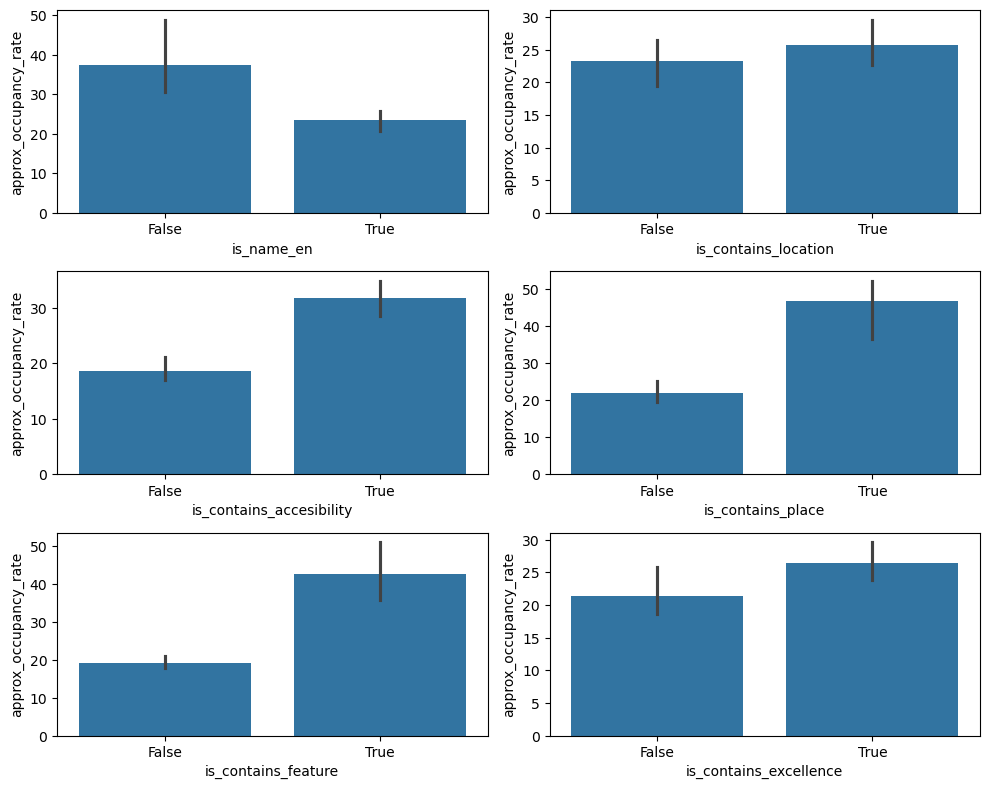

In [70]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

axes = ax.flatten()

columns = ['is_name_en', 'is_contains_location', 'is_contains_accesibility', 'is_contains_place', 'is_contains_feature', 'is_contains_excellence']

df_trend = df.loc[df['number_of_reviews_ltm'] > 0]

for i, col in enumerate(columns):
    sns.barplot(data=df_trend, x=col, y='approx_occupancy_rate', estimator='median', ax=axes[i])
    #axes[i].set_title(f'Popularity by {col}')

plt.tight_layout()
plt.show()

Note:
* When host put popular keyword on the name of their listing, seems they will get higher approximate occupancy rate.
* When the listing name contains feature, the median approximate of occupancy rate seems higher than other keywords, indicating feature is important for the guest.
* Looking at the is_name_en chart, the number of listings with a 'False' value is higher than those with 'True,' indicating that having listing names not in English is still acceptable.

### Statistical test

In [71]:
for col in ['is_name_en', 'is_contains_location', 'is_contains_accesibility', 'is_contains_place', 'is_contains_feature', 'is_contains_excellence']:
    contingency_table = pd.crosstab(df[col], df['is_popular'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Cramér's V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape)
    cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))

    print('=' * 50)
    print(f'\nChi-Square Test Results for {col}:')
    print(f'Chi2 Statistic: {chi2}')
    print(f'P-value: {p}')
    print(f'Degrees of Freedom: {dof}')
    print('Expected Frequencies:')
    print(expected)
    print(f'Cramér\'s V: {cramers_v}')

    alpha = 0.05
    
    if p < alpha:
        print(f'There is a significant association between {col} and popularity (reject H0).\n')
    else:
        print(f'There is no significant association between {col} and popularity (fail to reject H0).\n')


Chi-Square Test Results for is_name_en:
Chi2 Statistic: 2.043375261539411
P-value: 0.1528701177851536
Degrees of Freedom: 1
Expected Frequencies:
[[1271.13380949  695.86619051]
 [8952.86619051 4901.13380949]]
Cramér's V: 0.01136467708794025
There is no significant association between is_name_en and popularity (fail to reject H0).


Chi-Square Test Results for is_contains_location:
Chi2 Statistic: 377.0367158869452
P-value: 5.496944146006324e-84
Degrees of Freedom: 1
Expected Frequencies:
[[5443.83894823 2980.16105177]
 [4780.16105177 2616.83894823]]
Cramér's V: 0.15437424858747673
There is a significant association between is_contains_location and popularity (reject H0).


Chi-Square Test Results for is_contains_accesibility:
Chi2 Statistic: 811.9842476598168
P-value: 1.3381166203235115e-178
Degrees of Freedom: 1
Expected Frequencies:
[[6238.70147273 3415.29852727]
 [3985.29852727 2181.70147273]]
Cramér's V: 0.2265462286341371
There is a significant association between is_contains_acc

Notes:
* Listing names, whether in English or other languages, do not have a relationship with popularity.
* The content of listing names that includes location has a weak association with popularity.
* The content of listing names that includes accessibility has the highest weak association with popularity.
* The content of listing names that includes place has a weak association with popularity.
* The content of listing names that includes features has a weak association with popularity.
* The content of listing names that includes excellence also has a weak association with popularity.

## New Segment Exploration

### Count of listings by location

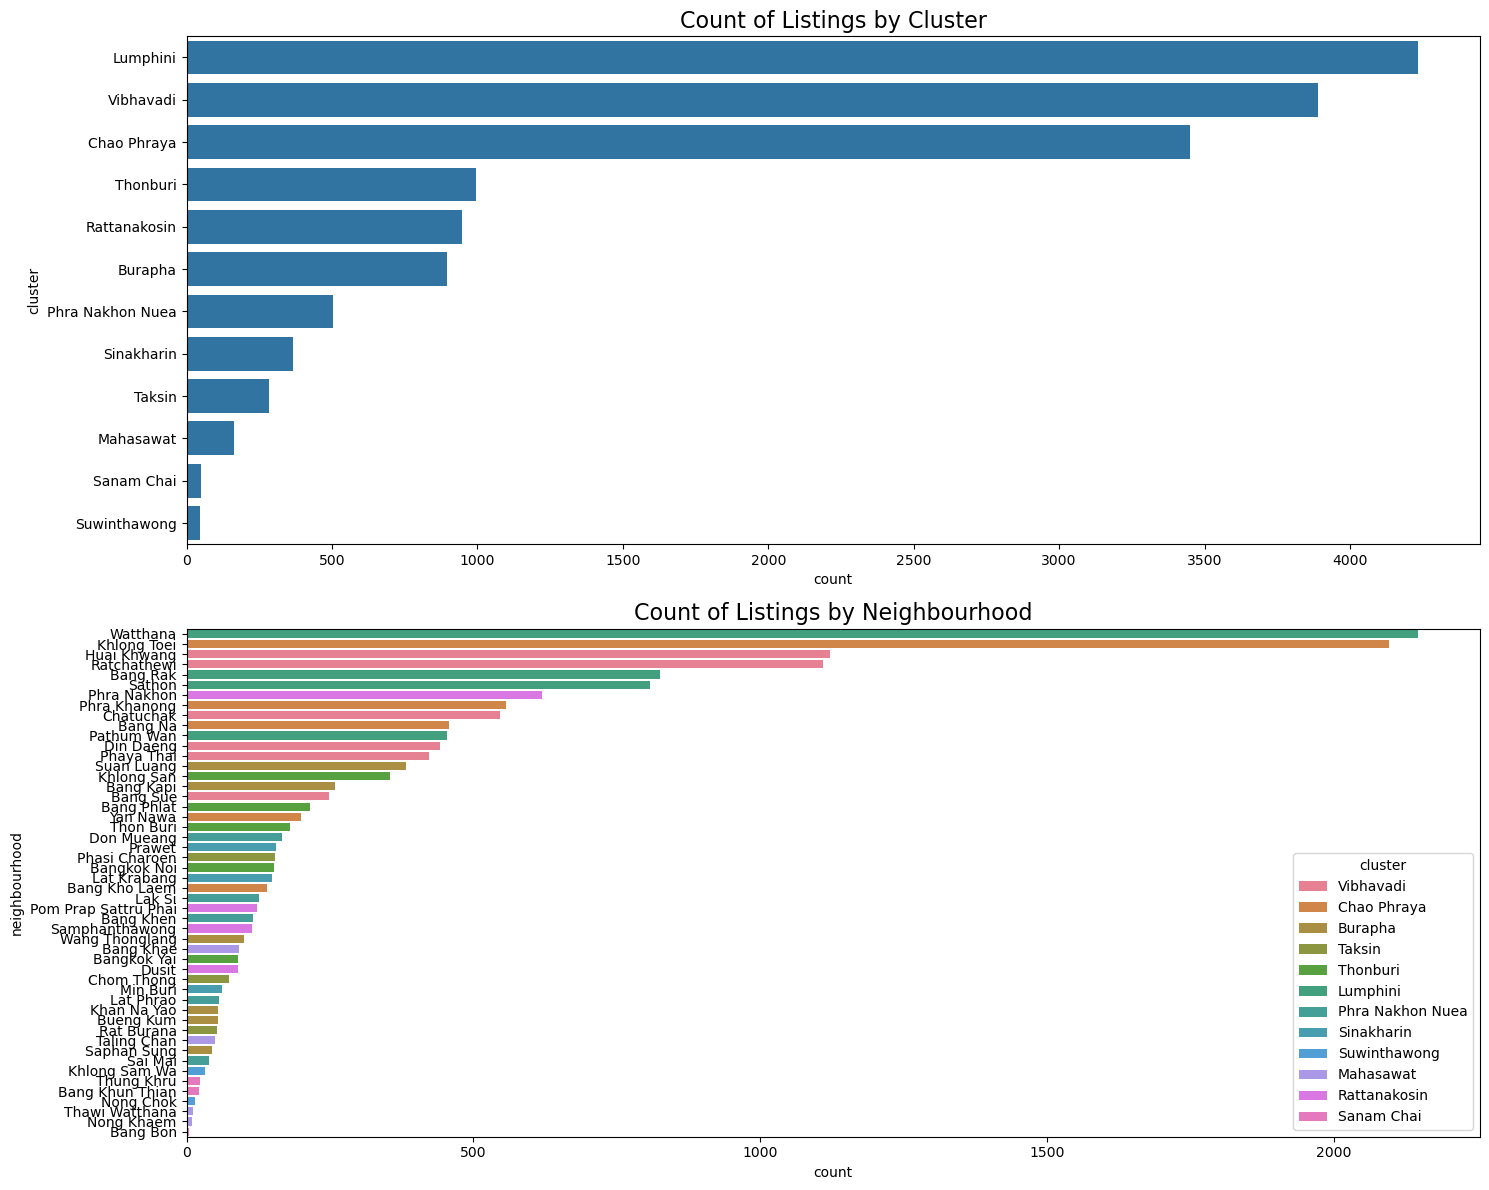

In [72]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.countplot(data=df, y='cluster', order=df['cluster'].value_counts().index, ax=ax[0])
sns.countplot(data=df, y='neighbourhood', hue='cluster', order=df['neighbourhood'].value_counts().index, ax=ax[1])

ax[0].set_title('Count of Listings by Cluster', fontsize=16)
ax[1].set_title('Count of Listings by Neighbourhood', fontsize=16)

plt.tight_layout()

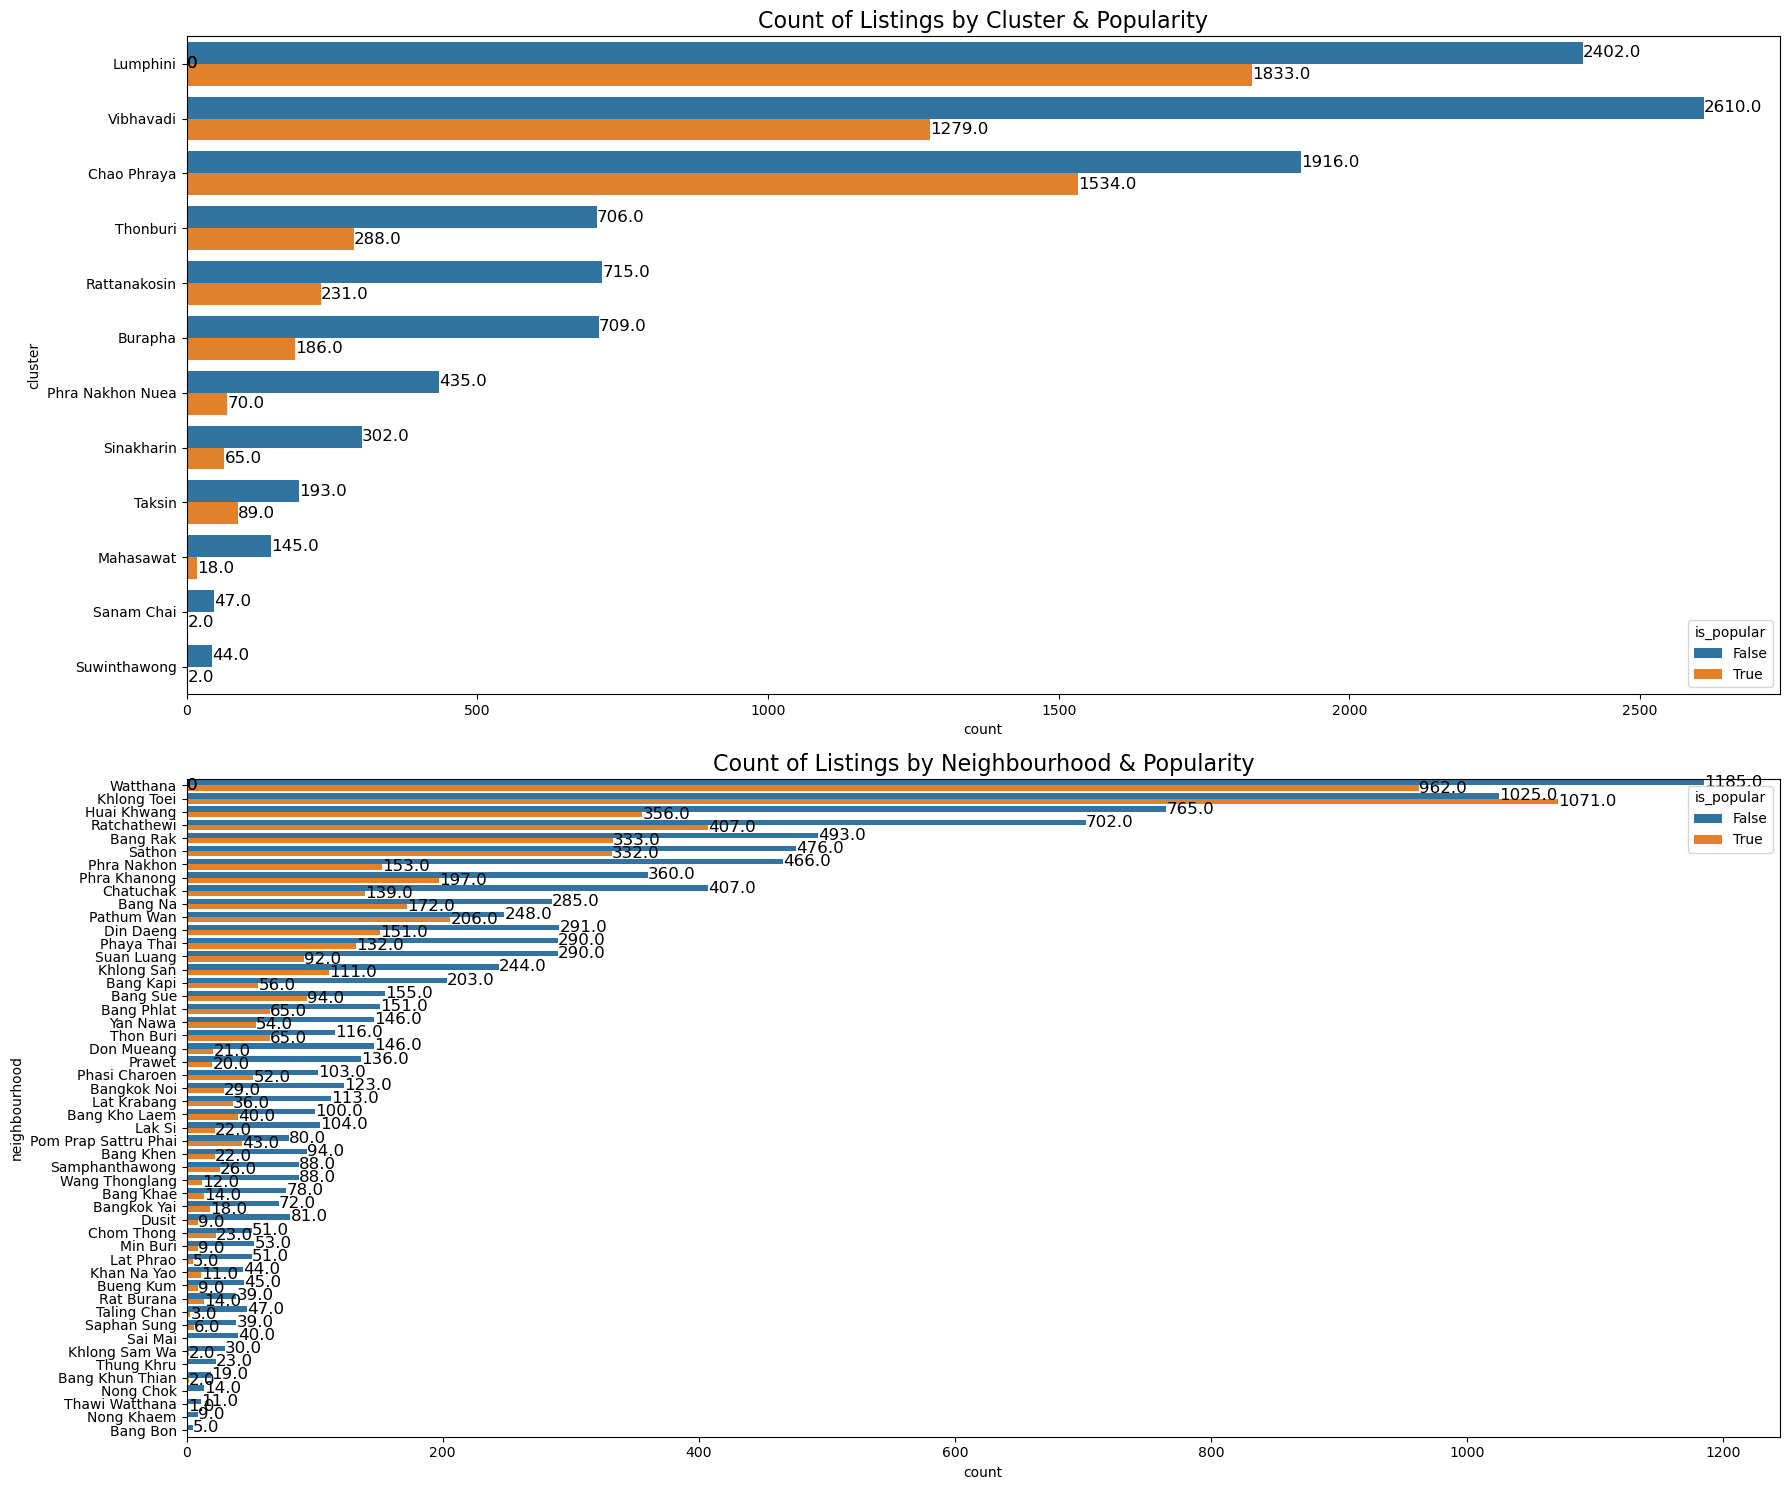

In [73]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.countplot(data=df, y='cluster', hue='is_popular', order=df['cluster'].value_counts().index, ax=ax[0])
sns.countplot(data=df, y='neighbourhood', hue='is_popular', order=df['neighbourhood'].value_counts().index, ax=ax[1])

ax[0].set_title('Count of Listings by Cluster & Popularity', fontsize=16)
ax[1].set_title('Count of Listings by Neighbourhood & Popularity', fontsize=16)

for p in ax[0].patches:
    ax[0].annotate(f'{p.get_width()}', 
                   (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), 
                   va='center', fontsize=12)

for p in ax[1].patches:
    ax[1].annotate(f'{p.get_width()}', 
                   (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), 
                   va='center', fontsize=12)

plt.tight_layout()

### Median prices of listing by location

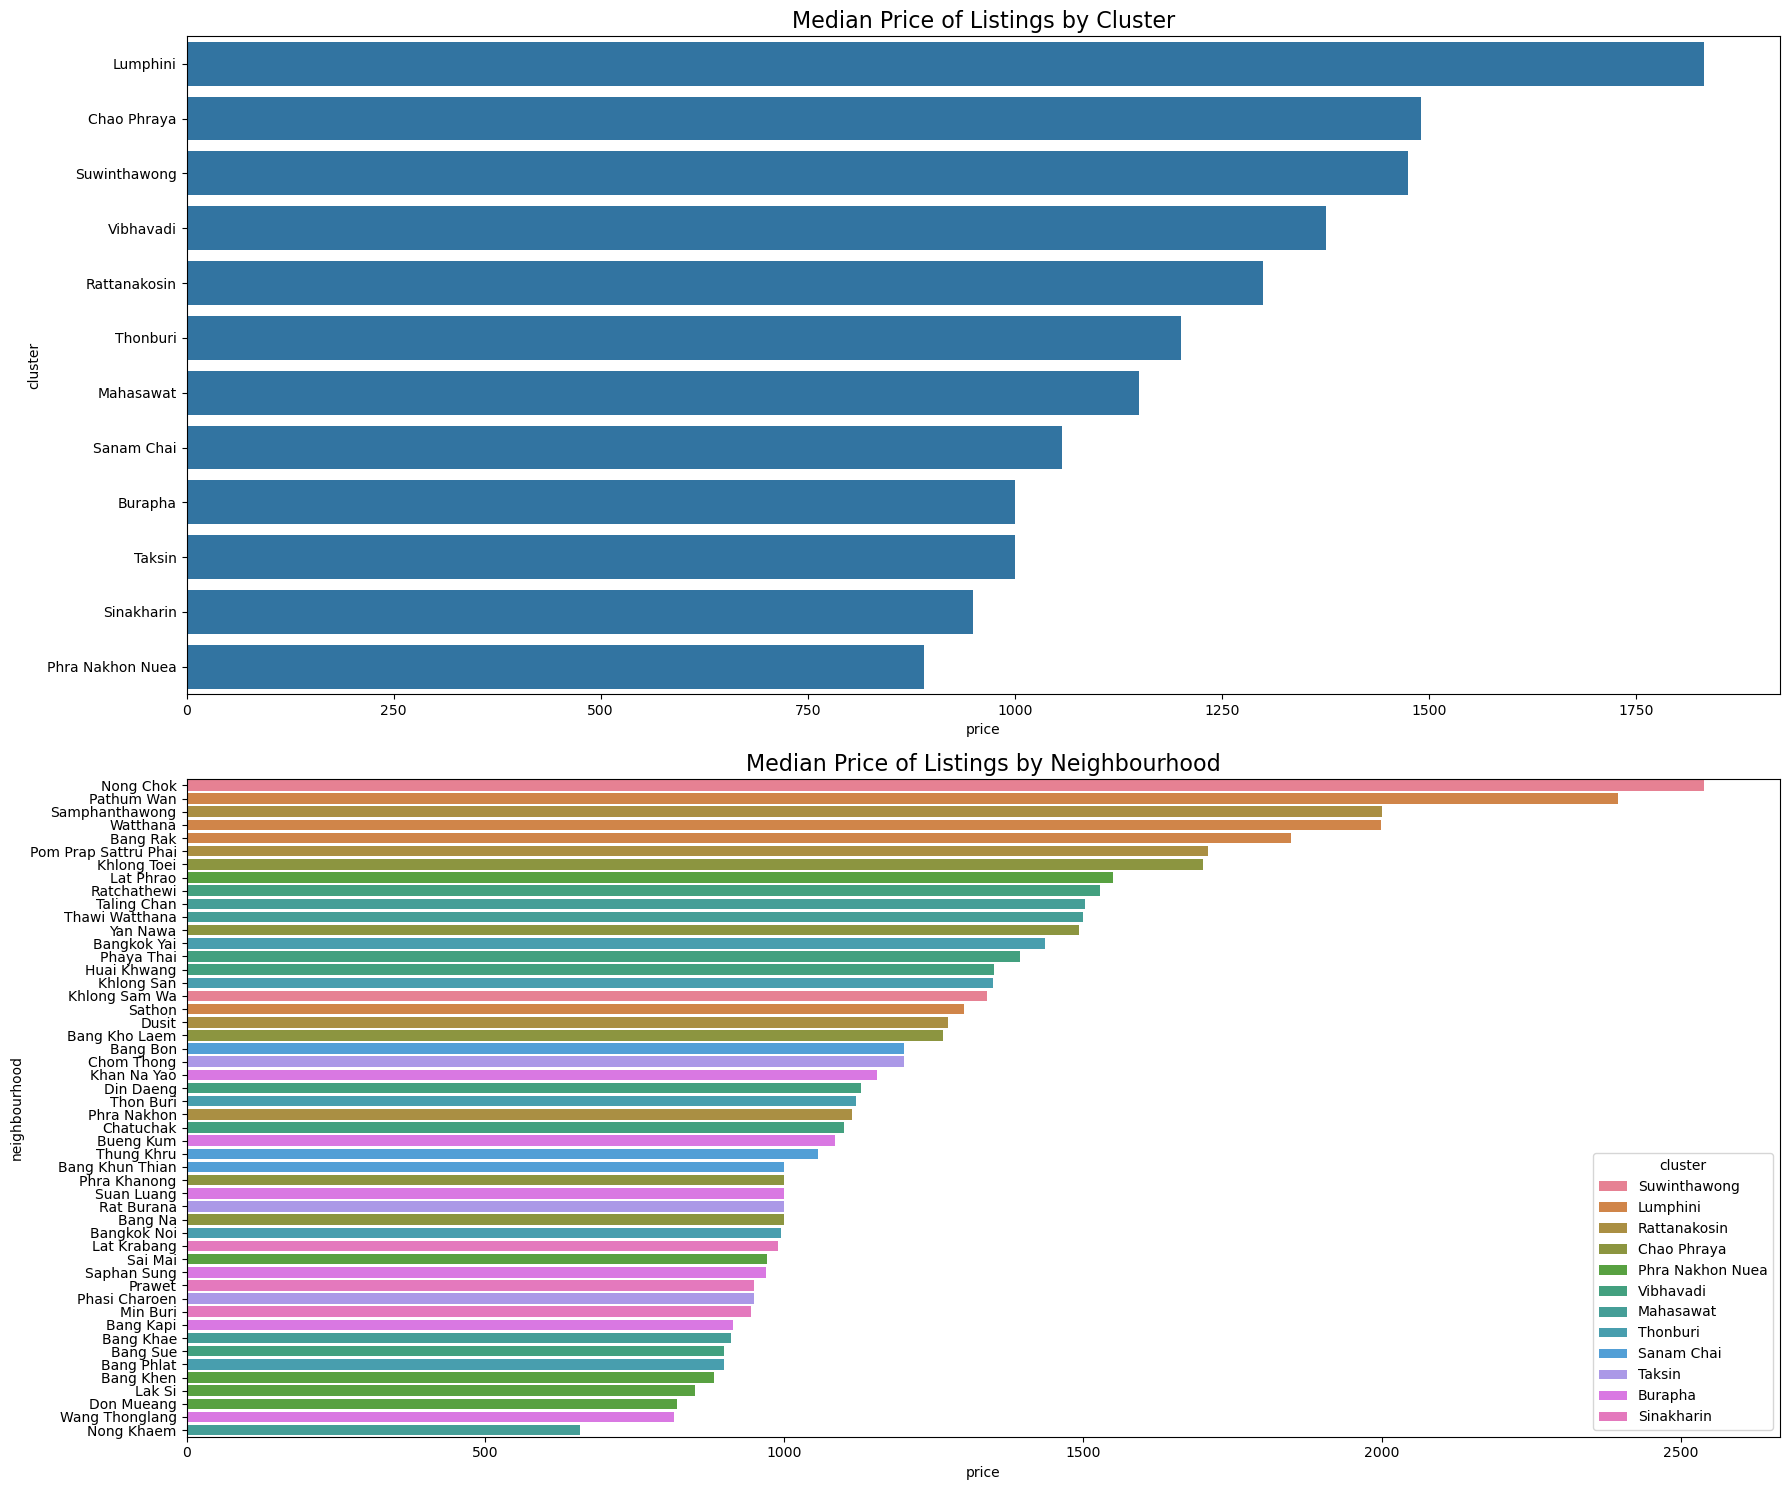

In [74]:
median_cluster = df.groupby('cluster')['price'].median().reset_index().sort_values(by='price', ascending=False)
median_neighbourhood = df.groupby(['neighbourhood', 'cluster'])['price'].median().reset_index().sort_values(by='price', ascending=False)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.barplot(data=median_cluster, y='cluster', x='price', estimator='median', ax=ax[0])
sns.barplot(data=median_neighbourhood, y='neighbourhood', x='price', hue='cluster', estimator='median', ax=ax[1])

ax[0].set_title('Median Price of Listings by Cluster', fontsize=16)
ax[1].set_title('Median Price of Listings by Neighbourhood', fontsize=16)

plt.tight_layout()

### Median approximately occupancy rates by location

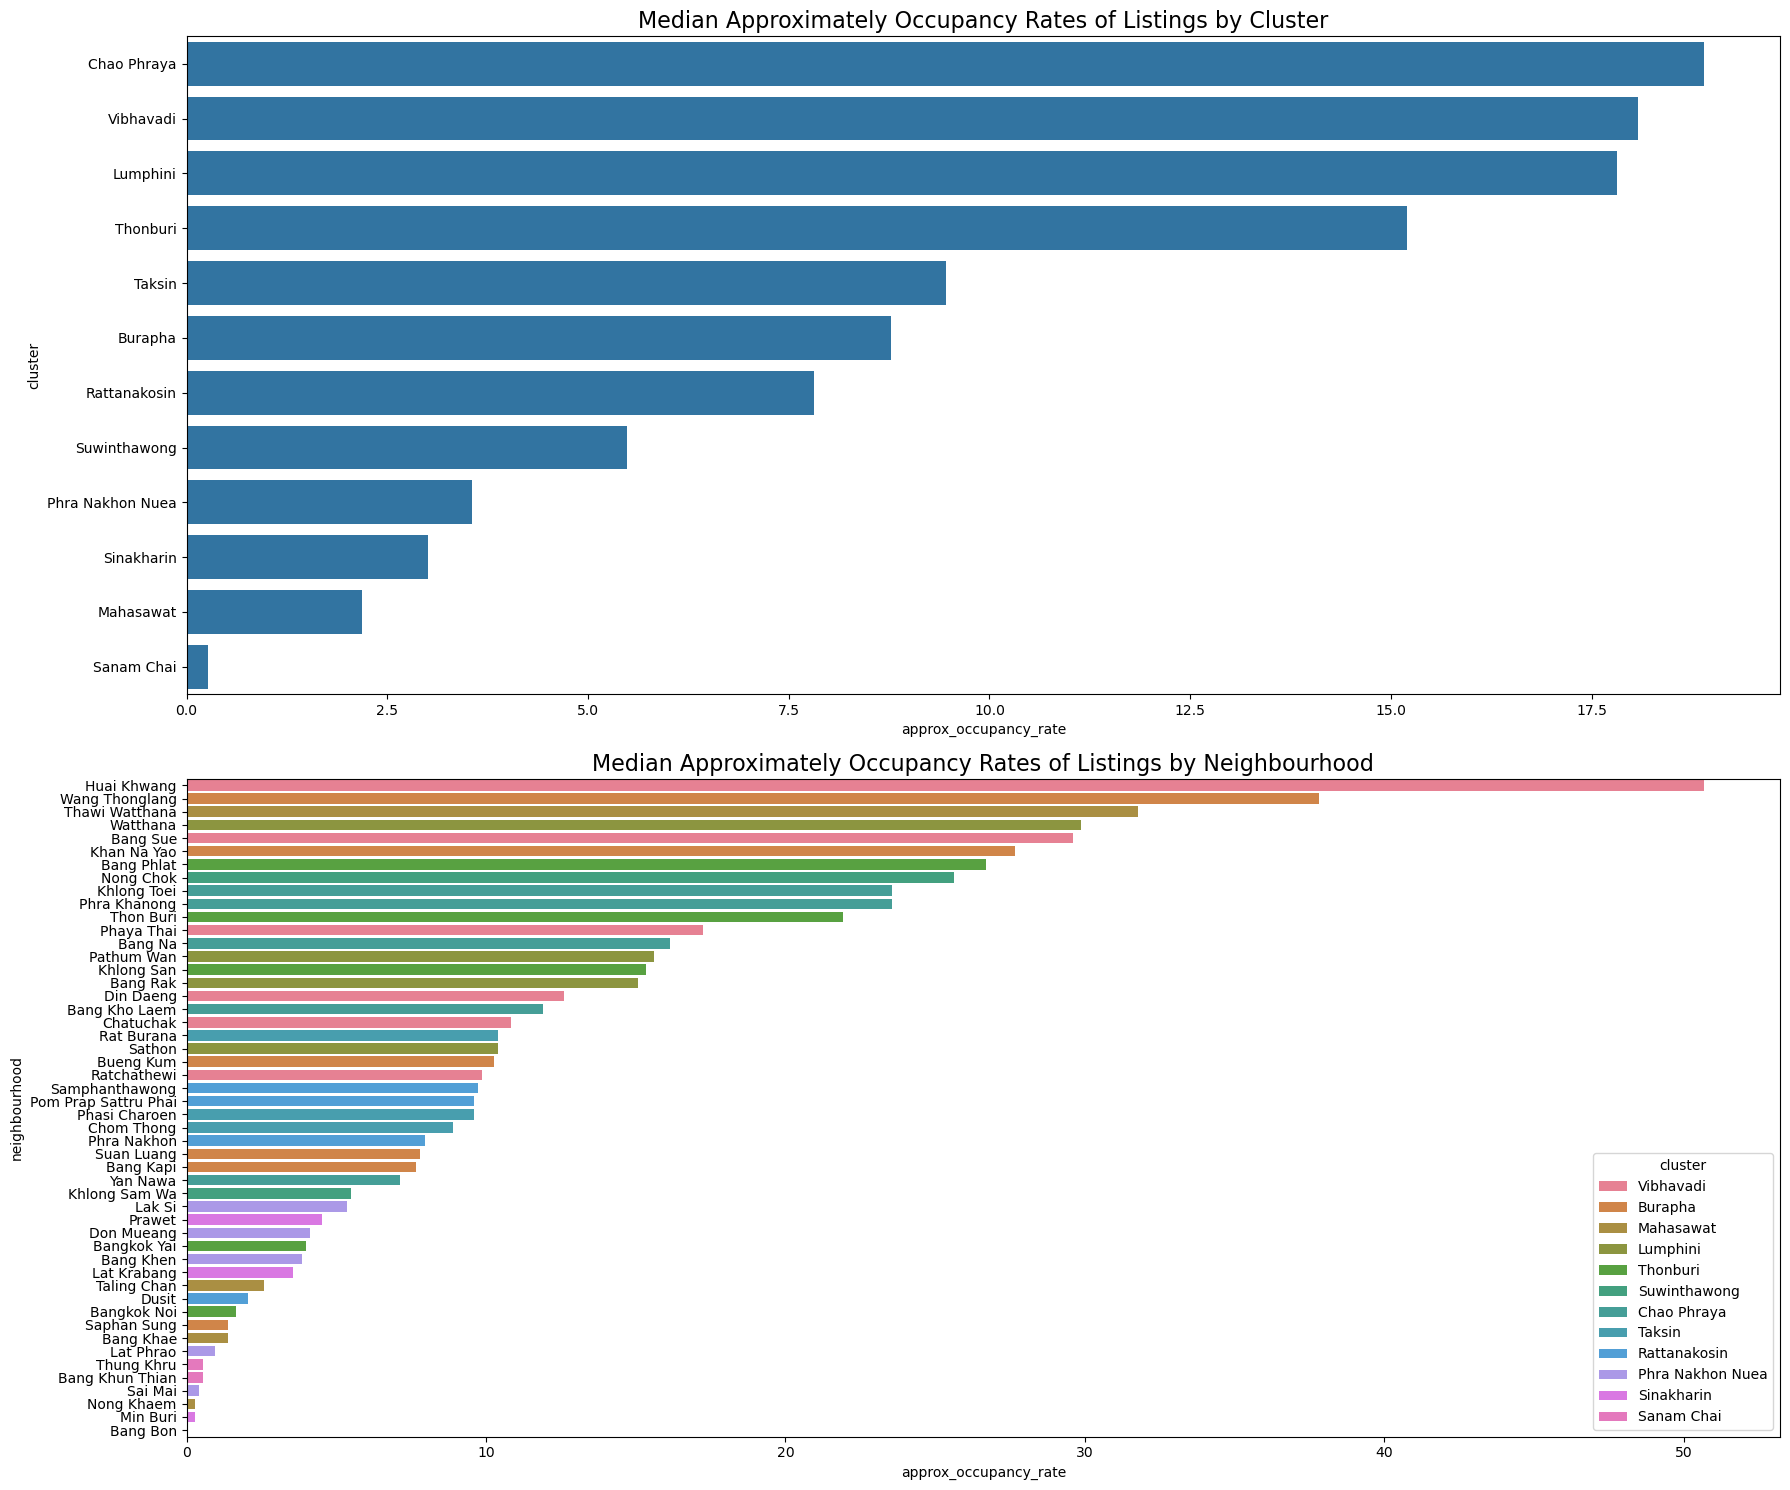

In [75]:
median_cluster = df.groupby('cluster')['approx_occupancy_rate'].median().reset_index().sort_values(by='approx_occupancy_rate', ascending=False)
median_neighbourhood = df.groupby(['neighbourhood', 'cluster'])['approx_occupancy_rate'].median().reset_index().sort_values(by='approx_occupancy_rate', ascending=False)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.barplot(data=median_cluster, y='cluster', x='approx_occupancy_rate', estimator='median', ax=ax[0])
sns.barplot(data=median_neighbourhood, y='neighbourhood', x='approx_occupancy_rate', hue='cluster', estimator='median', ax=ax[1])

ax[0].set_title('Median Approximately Occupancy Rates of Listings by Cluster', fontsize=16)
ax[1].set_title('Median Approximately Occupancy Rates of Listings by Neighbourhood', fontsize=16)

plt.tight_layout()

Notes:
* The number of listings in the Huai Khwang neighborhood ranks third highest, but in reality, it is still not effective because the proportion of popular listings is quite low.
* In terms of median price, Huai Khwang ranks 15th highest (not too low).
* With the highest median approximate occupancy rate of around 50%, Huai Khwang indicates a strong interest from many guests.
* Another factor in the first analysis is that this area has more entire home/apartment properties than others and offers many short-term stays.

# Summary

## Insights

* Most popular listings in Bangkok come from the central clusters (Lumphini, Vibhavadi, & Chao Phraya) due to the numerous tourist attractions and easy accessibility services.
* The preferred room type for popular listings in most areas is the entire home/apartment, except for the Rattanakosin cluster, where private rooms are more popular.
* The preferred length of stay for popular listings in most areas is also short-term stays.
* There are neighborhoods within popular clusters that have a low proportion of active listings. For example, Huai Khwang from the Vibhavadi cluster has the third-highest number of listings, but compared to neighborhoods with many listings, the proportion of its popular listings is low.
* Huai Khwang itself has potential, making it a viable area for experiments to attract more guests due to its large number of listings, the 15th highest median price, and the highest approximate occupancy rate over the next 365 days, indicating a trend of increasing guest interest in this area. Additionally, the preferences for room types and minimum night stays group align with what most guests prefer (entire home/apartment & short-term stays). By maximizing its potential, Airbnb could increase its revenue.
* Factors influencing prices come from categorical variables such as location and room type.
* Popular important keywords have a significant but still weak relationship with popularity levels, with the strongest correlation found when listing names include the keyword accessibility.

## Recommendation

### Business Team
* Focus on Popular Listing Types
    * Prioritize promoting entire homes/apartments, as these are the preferred room types in most areas, particularly in high-demand clusters like Lumphini, Vibhavadi, and Chao Phraya especially during important days where tourist at peak.
* Utilize Keywords in Listings
    * Educate hosts on the importance of incorporating popular keywords in their listing titles to enhance visibility, attractiveness & popularity.
* Pricing Monitoring
    * Make price recommendations for hosts based on location & room type to reduce underpaid or overpaid listings to ensure prices are reasonable for guests.
* Attracting More Hosts
    * With the projected increase in tourists in 2023, the business team can work on recruiting more potential hosts by considering busy locations & room types and ensuring diverse features at reasonable prices.

### Marketing Team
* Explore Huai Khwang’s Potential
    * Based on the information provided, the marketing team can develop strategies to attract tourists to Huai Khwang by highlighting its unique cultural sites, accesibility or unique experience for many guest.
* Segment the Market
    * Identify and target specific market segments such as location that prefer private room than other types by the guest or location that has highest median prices like Nong Chok.